# Coronavirus Disease (COVID-19)

https://github.com/owid/covid-19-data/tree/master/public/data/
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')                                              

# Import Image

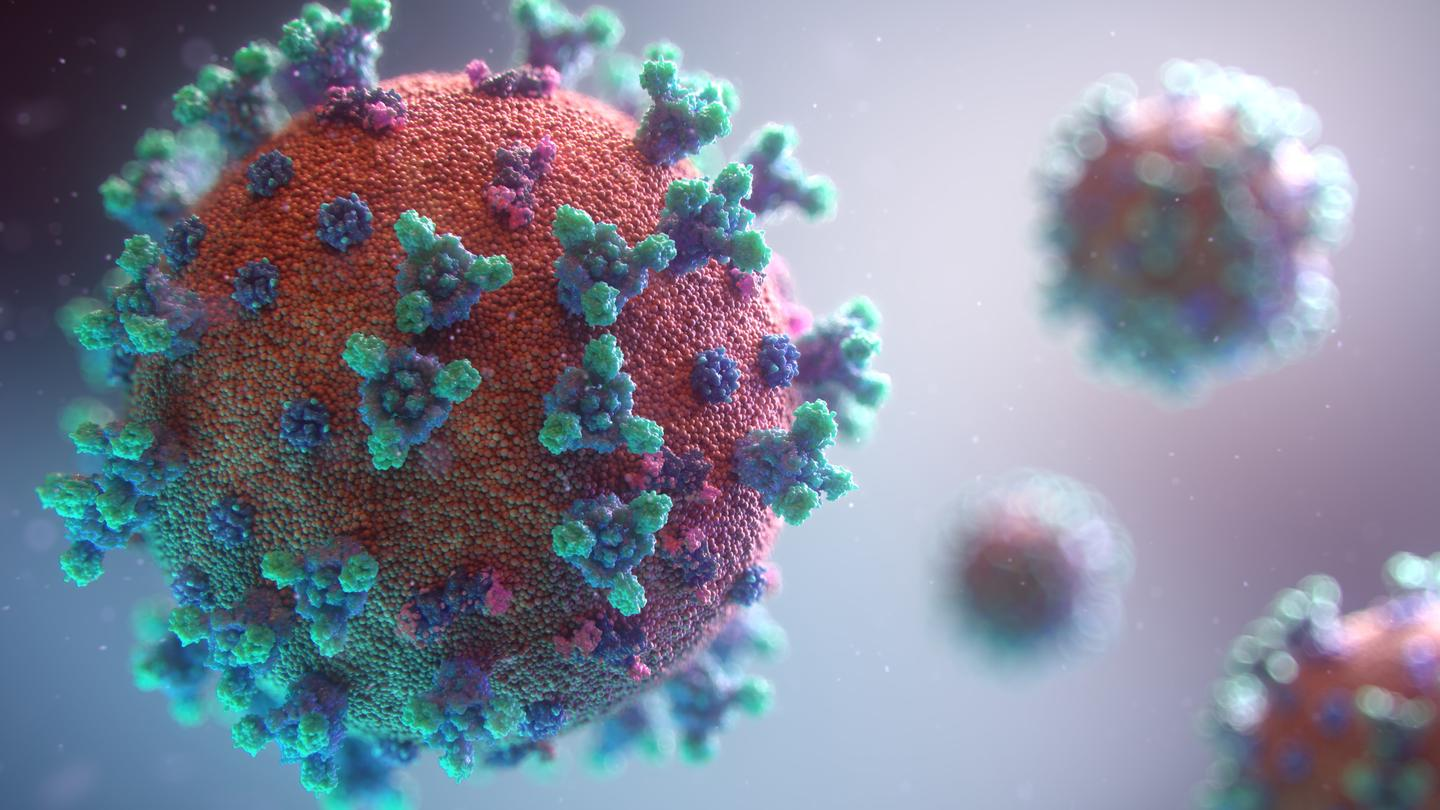

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'Covid 19.jpg')

display.Image(image_path)

# Fetch Data

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)

# Head and Tail

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [6]:
df.shape

(207073, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207073 entries, 0 to 207072
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    207073 non-null  object 
 1   continent                                   195102 non-null  object 
 2   location                                    207073 non-null  object 
 3   date                                        207073 non-null  object 
 4   total_cases                                 198700 non-null  float64
 5   new_cases                                   198372 non-null  float64
 6   new_cases_smoothed                          197195 non-null  float64
 7   total_deaths                                179922 non-null  float64
 8   new_deaths                                  179860 non-null  float64
 9   new_deaths_smoothed                         178693 non-null  float64
 

In [8]:
df.dtypes.value_counts()

float64    62
object      5
dtype: int64

In [9]:
df['iso_code'].value_counts(ascending=False).head(10)                     # explore the top ten count for different iso codes

ARG         950
MEX         950
THA         947
TWN         935
MAC         929
OWID_WRL    929
OWID_UMC    929
KOR         929
CHN         929
USA         929
Name: iso_code, dtype: int64

In [10]:
df['continent'].value_counts()                                                                            

Africa           47943
Europe           44952
Asia             44639
North America    31992
Oceania          14044
South America    11532
Name: continent, dtype: int64

In [11]:
round(df['continent'].value_counts(True), 3)                              # calculate the relative frequencies for each continent                        

Africa           0.246
Europe           0.230
Asia             0.229
North America    0.164
Oceania          0.072
South America    0.059
Name: continent, dtype: float64

(-1.136027448913251,
 1.3076374277217755,
 -1.1138621045691444,
 1.1071325997937083)

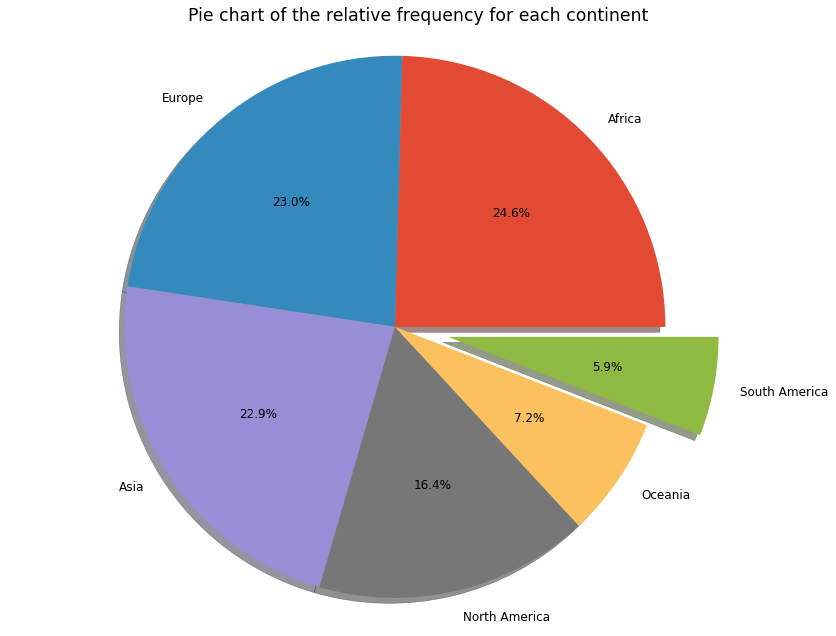

In [12]:
fig, ax = plt.subplots()

plt.pie(
          x=df['continent'].value_counts(True).values, labels=df['continent'].value_counts(True).keys(),
          autopct='%1.1f%%', shadow=True, 
          explode=[0, 0, 0, 0, 0, 0.2]
        )

ax.set(title='Pie chart of the relative frequency for each continent')
ax.axis('equal')

In [13]:
df['location'].value_counts().head(10)

Argentina              950
Mexico                 950
Thailand               947
Taiwan                 935
Macao                  929
World                  929
Upper middle income    929
South Korea            929
China                  929
United States          929
Name: location, dtype: int64

In [14]:
df.describe(include='object')

iso_code continent   location        date      tests_units
count    207073    195102     207073      207073           106786
unique      244         6        244         950                4
top         ARG    Africa  Argentina  2021-09-01  tests performed
freq        950     47943        950         243            80097

In [15]:
df.describe(include='float64')

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98700e+05  1.98372e+05         1.97195e+05   1.79922e+05   
mean   3.82616e+06  1.25798e+04         1.25886e+04   6.91139e+04   
std    2.40173e+07  8.72815e+04         8.52444e+04   3.58090e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.41300e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.16300e+04  6.50000e+01         1.00429e+02   1.03400e+03   
75%    4.47708e+05  1.01300e+03         1.15000e+03   9.10100e+03   
max    5.84596e+08  4.07947e+06         3.43795e+06   6.41809e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179860.00000         178693.00000             197787.00000   
mean      148.05277            148.81725              50199.01427   
std       760.71064            744.29871              91595.01808   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                910.85450   
50%         1.00000              1.71400               8186.41800   
75%        16.00000             17.28600              61522.34200   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197459.00000                    196287.00000   
mean               188.86821                       188.90680   
std                917.07673                       599.25006   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48600   
50%                  9.22500                        19.93000   
75%                102.46350                       135.74200   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              179022.00000            178960.00000   
mean                  638.50950                 1.49840   
std                   926.51292                 5.26148   
min                     0.00000                 0.00000   
25%                    26.42100                 0.00000   
50%                   184.21800                 0.05800   
75%                   948.22625                 1.09100   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177798.00000       155030.00000   27351.00000   
mean                           1.49801            0.96596     859.17400   
std                            3.45057            0.38095    2501.45885   
min                            0.00000           -0.05000       0.00000   
25%                            0.00500            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48700            1.17000     618.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27351.00000    29273.00000                29273.00000   
mean                   22.23127     4211.72367                  160.26785   
std                    26.71723    10973.91217                  195.78773   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      164.00000                   31.41400   
50%                    11.79700      815.00000                   89.47300   
75%                    31.56700     3205.00000                  207.58600   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6783.00000                         6783.00000   
mean               439.37447                           13.70803   
std                594.83626                           15.43856   
min             

In [16]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))            # convert date to pandas datetime
df.select_dtypes(include='datetime')

date
0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
...           ...
207068 2022-08-03
207069 2022-08-04
207070 2022-08-05
207071 2022-08-06
207072 2022-08-07

[207073 rows x 1 columns]

In [17]:
df['day_name'] = df['date'].dt.day_name()                             # add name of the day
df['day'] = df['date'].dt.day                                         # day
df['month_num'] = df['date'].dt.month                                 # add month number
df['year'] =  df['date'].dt.year                                      # year

df[['year', 'month_num', 'day', 'day_name']]

year  month_num  day   day_name
0       2020          2   24     Monday
1       2020          2   25    Tuesday
2       2020          2   26  Wednesday
3       2020          2   27   Thursday
4       2020          2   28     Friday
...      ...        ...  ...        ...
207068  2022          8    3  Wednesday
207069  2022          8    4   Thursday
207070  2022          8    5     Friday
207071  2022          8    6   Saturday
207072  2022          8    7     Sunday

[207073 rows x 4 columns]

In [18]:
# assign month names
def assign_month_name(x):
  if x == 1:
    return 'Jan'
  elif x == 2:
    return 'Feb'
  elif x == 3:
     return 'Mar'
  elif x == 4:
    return 'Apr'
  elif x == 5:
    return 'May'
  elif x == 6:
     return 'June'
  elif x == 7:
    return 'July'
  elif x == 8:
    return 'Aug'
  elif x == 9:
    return 'Sep'
  elif x == 10:
    return 'Oct'
  elif x == 11:
    return 'Nov'
  else:
    return 'Dec'

df['month_name'] = df['month_num'].apply(assign_month_name)
df['month_name'].value_counts()

July    21601
May     21595
June    20971
Apr     20655
Mar     19558
Aug     16028
Jan     14887
Feb     14736
Dec     14512
Oct     14479
Nov     14070
Sep     13981
Name: month_name, dtype: int64

In [19]:
# change month name to categorical 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month_name'] = pd.Categorical(df['month_name'], ordered_months)

df['month_name'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

[Text(0.5, 1.0, 'Total count by month name'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Month Name')]

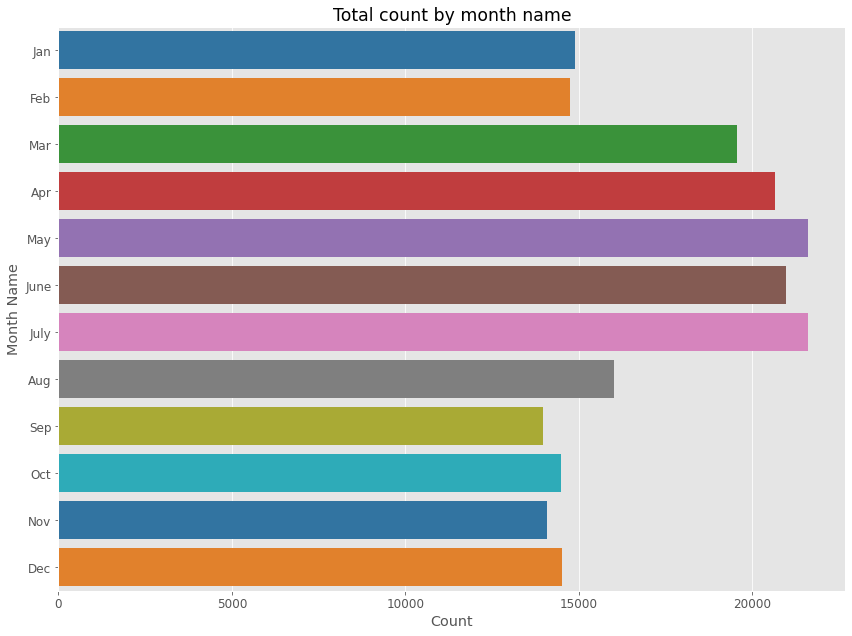

In [20]:
fig, ax = plt.subplots()

sns.countplot(data=df, y='month_name', hue_order='month_name', palette='tab10')

ax.set(title='Total count by month name', xlabel='Count',  ylabel='Month Name')

# Missing Data Exploration

In [21]:
df.isna().sum()                                                              # over 50 % missing data in some columns

iso_code                                           0
continent                                      11971
location                                           0
date                                               0
total_cases                                     8373
new_cases                                       8701
new_cases_smoothed                              9878
total_deaths                                   27151
new_deaths                                     27213
new_deaths_smoothed                            28380
total_cases_per_million                         9286
new_cases_per_million                           9614
new_cases_smoothed_per_million                 10786
total_deaths_per_million                       28051
new_deaths_per_million                         28113
new_deaths_smoothed_per_million                29275
reproduction_rate                              52043
icu_patients                                  179722
icu_patients_per_million                      

<AxesSubplot:>

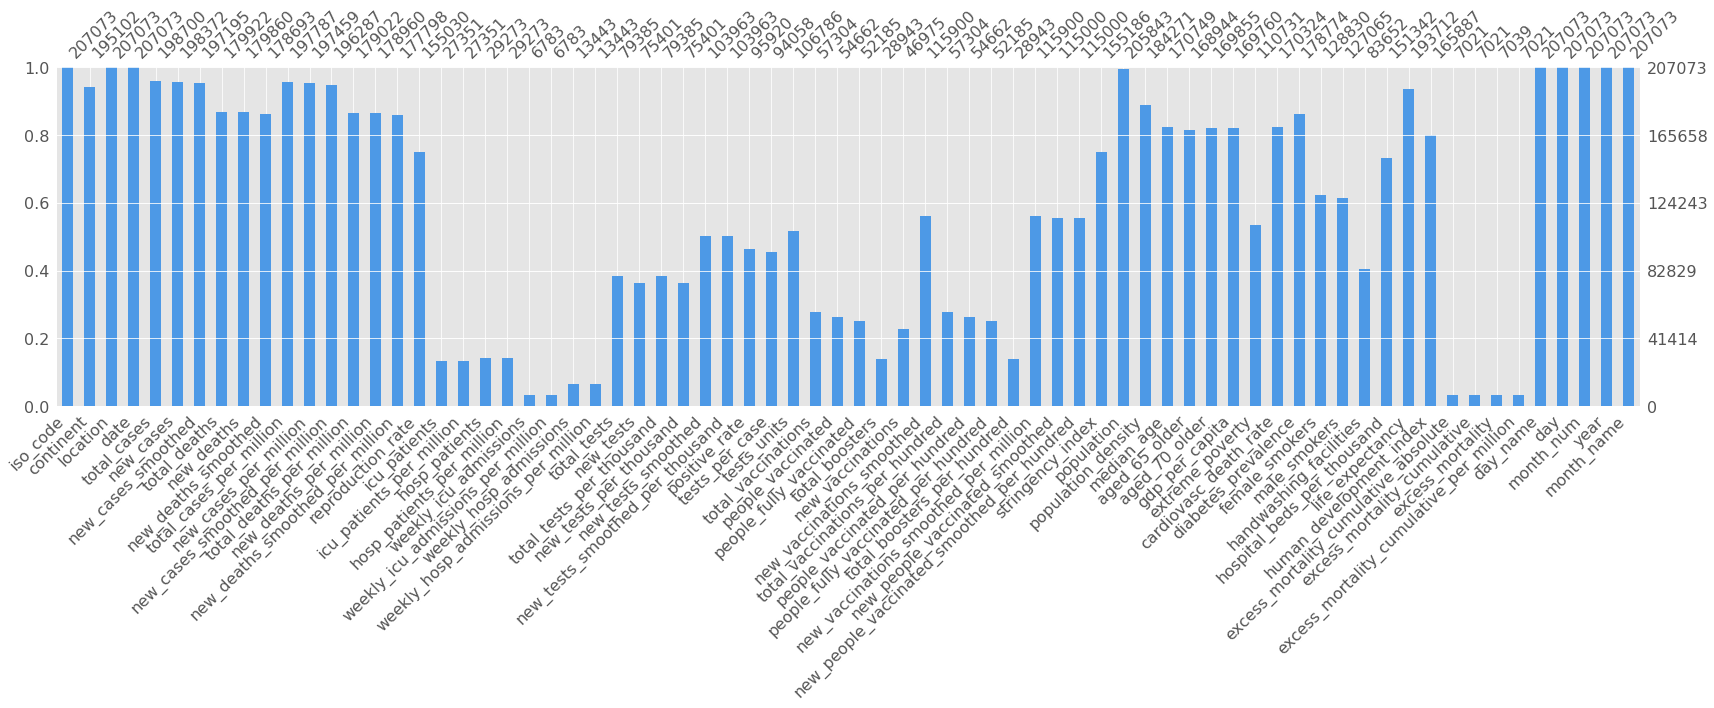

In [22]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9))                              # plot missing values for each column

<AxesSubplot:>

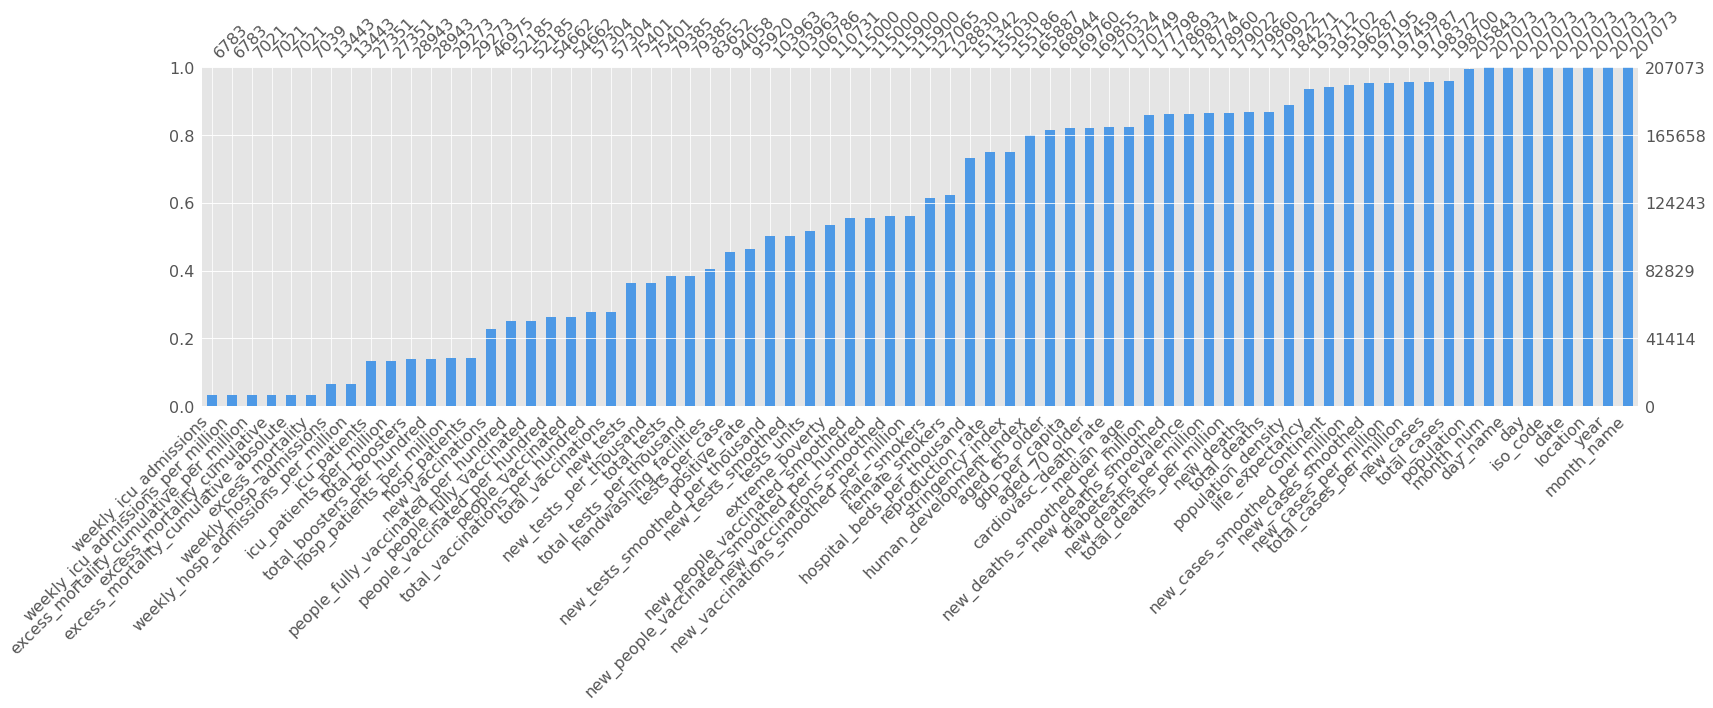

In [23]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9), sort='ascending') 

In [24]:
# filter for missing values based on the column with the highest values missing
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
207068      ZWE    Africa     Zimbabwe 2022-08-03     256423.0       20.0   
207069      ZWE    Africa     Zimbabwe 2022-08-04     256444.0       21.0   
207070      ZWE    Africa     Zimbabwe 2022-08-05     256444.0        0.0   
207071      ZWE    Africa     Zimbabwe 2022-08-06     256444.0        0.0   
207072      ZWE    Africa     Zimbabwe 2022-08-07     256447.0        3.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
207068              15.429        5579.0         1.0                0.714   
207069              15.429        5581.0         2.0                0.714   
207070               9.714        5581.0         0.0                0.571   
207071               9.714        5581.0         0.0                0.571   
207072               9.857        5584.0         3.0                1.000   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
207068                16032.927                  1.251   
207069                16034.240                  1.313   
207070                16034.240                  0.000   
207071                16034.240                  0.000   
207072                16034.427                  0.188   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
207068                           0.965                   348.829   
207069                           0.965                   348.954   
207070                           0.607                   348.954   
207071                           0.607                   348.954   
207072                           0.616                   349.141   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
207068                   0.063                            0.045   
207069                   0.125                            0.045   
207070                   0.000          

Common strategies that can be used to handle missing data for this project may include:
1) ignoring the missing data
2) dropping records with missing data
3) filling the missing data

In [25]:
# droping missing data based on rows containing missing values results in an empty dataframe   
df.dropna(axis='index')

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, day_name, day, month_num, year, month_name]
Index: []

In [26]:
# dropping missing values based on columns also returns an a smaller dataframe as almost all columns contains a missing value
df.dropna(axis='columns')

iso_code     location       date   day_name  day  month_num  year  \
0           AFG  Afghanistan 2020-02-24     Monday   24          2  2020   
1           AFG  Afghanistan 2020-02-25    Tuesday   25          2  2020   
2           AFG  Afghanistan 2020-02-26  Wednesday   26          2  2020   
3           AFG  Afghanistan 2020-02-27   Thursday   27          2  2020   
4           AFG  Afghanistan 2020-02-28     Friday   28          2  2020   
...         ...          ...        ...        ...  ...        ...   ...   
207068      ZWE     Zimbabwe 2022-08-03  Wednesday    3          8  2022   
207069      ZWE     Zimbabwe 2022-08-04   Thursday    4          8  2022   
207070      ZWE     Zimbabwe 2022-08-05     Friday    5          8  2022   
207071      ZWE     Zimbabwe 2022-08-06   Saturday    6          8  2022   
207072      ZWE     Zimbabwe 2022-08-07     Sunday    7          8  2022   

       month_name  
0             Feb  
1             Feb  
2             Feb  
3             Feb  
4             Feb  
...           ...  
207068        Aug  
207069        Aug  
207070        Aug  
207071        Aug  
207072        Aug  

[207073 rows x 8 columns]

Filling the missing data

In [27]:
# filling missing values with a constant value will not be a good decision for instance in total cases or deaths that varies for different locations
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
207068      ZWE    Africa     Zimbabwe 2022-08-03     256423.0       20.0   
207069      ZWE    Africa     Zimbabwe 2022-08-04     256444.0       21.0   
207070      ZWE    Africa     Zimbabwe 2022-08-05     256444.0        0.0   
207071      ZWE    Africa     Zimbabwe 2022-08-06     256444.0        0.0   
207072      ZWE    Africa     Zimbabwe 2022-08-07     256447.0        3.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
207068              15.429        5579.0         1.0                0.714   
207069              15.429        5581.0         2.0                0.714   
207070               9.714        5581.0         0.0                0.571   
207071               9.714        5581.0         0.0                0.571   
207072               9.857        5584.0         3.0                1.000   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
207068                16032.927                  1.251   
207069                16034.240                  1.313   
207070                16034.240                  0.000   
207071                16034.240                  0.000   
207072                16034.427                  0.188   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
207068                           0.965                   348.829   
207069                           0.965                   348.954   
207070                           0.607                   348.954   
207071                           0.607                   348.954   
207072                           0.616                   349.141   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
207068                   0.063                            0.045   
207069                   0.125                            0.045   
207070                   0.000          

Fill with Mean / Median of Group

In [28]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('mean')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.93480e+05  1.93480e+05         1.93480e+05   1.90216e+05   
mean   3.78384e+06  1.22928e+04         1.22969e+04   6.47839e+04   
std    2.43120e+07  8.80126e+04         8.58731e+04   3.49309e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.90800e+03  0.00000e+00         5.85700e+00   7.40000e+01   
50%    3.63155e+04  5.40000e+01         8.55710e+01   7.39871e+02   
75%    3.72591e+05  8.64000e+02         9.61893e+02   6.89325e+03   
max    5.84596e+08  4.07947e+06         3.43795e+06   6.41809e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  190216.00000         190216.00000             192567.00000   
mean      138.56033            139.13974              46999.29241   
std       740.57701            723.81341              88108.10151   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.09570                824.19300   
50%         1.00000              1.28600               7040.10800   
75%        12.00000             13.00000              56503.89850   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           192567.00000                    192567.00000   
mean               177.16298                       176.60120   
std                907.84143                       580.02409   
min                  0.00000                         0.00000   
25%                  0.00000                         1.32700   
50%                  7.85600                        17.56800   
75%                 92.05950                       124.84650   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              189303.00000            189303.00000   
mean                  592.22252                 1.47735   
std                   886.89873                 5.10427   
min                     0.00000                 0.00000   
25%                    26.37750                 0.00000   
50%                   171.94100                 0.09254   
75%                   856.21200                 1.18400   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     189303.00000       160886.00000   28013.00000   
mean                           1.46539            0.95885     791.16580   
std                            3.33298            0.37209    2602.32815   
min                            0.00000           -0.05000       0.00000   
25%                            0.00900            0.77000      26.00000   
50%                            0.24800            0.98000      95.00000   
75%                            1.53850            1.14000     465.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28013.00000    28977.00000                28977.00000   
mean                   19.04595     4070.57335                  155.85283   
std                    22.65842    11192.43172                  189.03547   
min                     0.00000        0.00000                    0.00000   
25%                     4.58900      156.00000                   36.38200   
50%                     9.83000      789.00000                   84.72600   
75%                    26.84300     3071.00000                  206.87700   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9525.00000                         9525.00000   
mean               180.18188                           11.84374   
std                310.40049                            8.99844   
min             

In [29]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('median')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.93480e+05  1.93480e+05         1.93480e+05   1.90216e+05   
mean   3.78306e+06  1.22854e+04         1.22663e+04   6.48609e+04   
std    2.43117e+07  8.80128e+04         8.58281e+04   3.49484e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.84300e+03  0.00000e+00         5.71400e+00   7.30000e+01   
50%    3.63040e+04  5.40000e+01         8.47140e+01   7.37000e+02   
75%    3.71420e+05  8.54000e+02         9.42893e+02   6.86100e+03   
max    5.84596e+08  4.07947e+06         3.43795e+06   6.41809e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  190216.00000         190216.00000             192567.00000   
mean      138.02189            138.60366              46931.12798   
std       740.48821            723.65473              88093.33458   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                821.04800   
50%         1.00000              1.14300               7025.79700   
75%        11.00000             12.42900              56449.57300   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           192567.00000                    192567.00000   
mean               176.10820                       175.01179   
std                907.76701                       579.76620   
min                  0.00000                         0.00000   
25%                  0.00000                         1.29600   
50%                  7.69900                        17.25100   
75%                 90.50600                       122.09900   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              189303.00000            189303.00000   
mean                  595.12979                 1.34295   
std                   890.32061                 5.08555   
min                     0.00000                 0.00000   
25%                    25.61500                 0.00000   
50%                   171.19700                 0.00900   
75%                   860.33300                 0.85300   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     189303.00000       160886.00000   28013.00000   
mean                           1.38017            0.95608     774.01224   
std                            3.33238            0.37310    2565.72208   
min                            0.00000           -0.05000       0.00000   
25%                            0.00000            0.77000      25.00000   
50%                            0.19000            0.98000      94.00000   
75%                            1.30600            1.14000     461.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28013.00000    28977.00000                28977.00000   
mean                   18.69201     3857.20741                  150.16841   
std                    23.06521    10883.81815                  188.49186   
min                     0.00000        0.00000                    0.00000   
25%                     3.77500      155.00000                   35.97600   
50%                     9.29400      743.00000                   79.53900   
75%                    26.00300     2997.00000                  184.47400   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9525.00000                         9525.00000   
mean               150.42698                            8.42792   
std                288.45059                            4.62017   
min             

In [30]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98700e+05  1.98372e+05         1.97195e+05   1.79922e+05   
mean   3.82616e+06  1.25798e+04         1.25886e+04   6.91139e+04   
std    2.40173e+07  8.72815e+04         8.52444e+04   3.58090e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.41300e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.16300e+04  6.50000e+01         1.00429e+02   1.03400e+03   
75%    4.47708e+05  1.01300e+03         1.15000e+03   9.10100e+03   
max    5.84596e+08  4.07947e+06         3.43795e+06   6.41809e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179860.00000         178693.00000             197787.00000   
mean      148.05277            148.81725              50199.01427   
std       760.71064            744.29871              91595.01808   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                910.85450   
50%         1.00000              1.71400               8186.41800   
75%        16.00000             17.28600              61522.34200   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197459.00000                    196287.00000   
mean               188.86821                       188.90680   
std                917.07673                       599.25006   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48600   
50%                  9.22500                        19.93000   
75%                102.46350                       135.74200   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              179022.00000            178960.00000   
mean                  638.50950                 1.49840   
std                   926.51292                 5.26148   
min                     0.00000                 0.00000   
25%                    26.42100                 0.00000   
50%                   184.21800                 0.05800   
75%                   948.22625                 1.09100   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177798.00000       155030.00000   27351.00000   
mean                           1.49801            0.96596     859.17400   
std                            3.45057            0.38095    2501.45885   
min                            0.00000           -0.05000       0.00000   
25%                            0.00500            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48700            1.17000     618.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27351.00000    29273.00000                29273.00000   
mean                   22.23127     4211.72367                  160.26785   
std                    26.71723    10973.91217                  195.78773   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      164.00000                   31.41400   
50%                    11.79700      815.00000                   89.47300   
75%                    31.56700     3205.00000                  207.58600   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6783.00000                         6783.00000   
mean               439.37447                           13.70803   
std                594.83626                           15.43856   
min             

Forward Fill & Back Fill within Groups

In [31]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('ffill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.91925e+05  1.91925e+05         1.90779e+05   1.73182e+05   
mean   3.81059e+06  1.23911e+04         1.23908e+04   6.99453e+04   
std    2.44075e+07  8.83687e+04         8.63671e+04   3.64836e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.04500e+03  0.00000e+00         6.00000e+00   9.70000e+01   
50%    3.67300e+04  5.50000e+01         8.64290e+01   9.04000e+02   
75%    3.74696e+05  8.67000e+02         9.56215e+02   7.89175e+03   
max    5.84596e+08  4.07947e+06         3.43795e+06   6.41809e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  173381.00000         172271.00000             191012.00000   
mean      150.63191            151.36095              47180.24518   
std       774.25457            757.62475              88369.45314   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                852.17900   
50%         1.00000              1.57100               7084.84100   
75%        14.00000             15.00000              56751.46800   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           191012.00000                    189871.00000   
mean               178.85895                       177.06178   
std                915.32093                       584.04649   
min                  0.00000                         0.00000   
25%                  0.00000                         1.33600   
50%                  7.90500                        17.42600   
75%                 91.82700                       123.36700   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              172282.00000            172481.00000   
mean                  609.34249                 1.46648   
std                   913.51250                 5.48330   
min                     0.00000                 0.00000   
25%                    24.67625                 0.00000   
50%                   170.95500                 0.04500   
75%                   890.19400                 1.00900   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     171376.00000       149228.00000   25018.00000   
mean                           1.45672            0.96045     724.41750   
std                            3.46122            0.38440    2563.73737   
min                            0.00000           -0.05000       0.00000   
25%                            0.00200            0.76000      22.00000   
50%                            0.20800            0.98000      94.00000   
75%                            1.38600            1.16000     385.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               25018.00000    26661.00000                26661.00000   
mean                   18.36189     3724.67541                  153.20582   
std                    23.62100    11003.20307                  196.81211   
min                     0.00000        0.00000                    0.00000   
25%                     3.05200      129.00000                   28.63600   
50%                     8.44300      679.00000                   83.53100   
75%                    24.29650     2540.00000                  189.80800   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6220.00000                         6220.00000   
mean                53.24357                           12.96508   
std                114.12083                           21.15550   
min             

In [32]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.93480e+05  1.93295e+05         1.93295e+05   1.90216e+05   
mean   3.77996e+06  1.22927e+04         1.22266e+04   6.36817e+04   
std    2.43116e+07  8.80549e+04         8.58146e+04   3.48690e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.75800e+03  0.00000e+00         5.28600e+00   4.10000e+01   
50%    3.55480e+04  5.20000e+01         8.05710e+01   6.20000e+02   
75%    3.68032e+05  8.47000e+02         9.22286e+02   6.37225e+03   
max    5.84596e+08  4.07947e+06         3.43795e+06   6.41809e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  190142.00000         190142.00000             192567.00000   
mean      137.47134            137.16208              46799.31280   
std       740.59765            722.48317              88113.13768   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                790.77450   
50%         1.00000              1.00000               6876.19900   
75%        11.00000             11.57100              56094.82000   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           192382.00000                    192382.00000   
mean               176.13612                       174.41584   
std                908.24756                       580.23280   
min                  0.00000                         0.00000   
25%                  0.00000                         1.22300   
50%                  7.65200                        16.25050   
75%                 89.74475                       120.11200   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              189303.00000            189229.00000   
mean                  556.06331                 2.84072   
std                   887.87622                12.87735   
min                     0.00000                 0.00000   
25%                    14.67700                 0.00000   
50%                   119.56200                 0.09000   
75%                   757.70400                 1.33300   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                      189229.0000       159967.00000   27529.00000   
mean                            1.6243            0.98684     732.51135   
std                             3.9199            0.43075    2543.20888   
min                             0.0000           -0.05000       0.00000   
25%                             0.0080            0.77000      22.00000   
50%                             0.2190            0.98000      92.00000   
75%                             1.5320            1.19000     374.00000   
max                           148.6730            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27529.00000    28215.00000                28215.00000   
mean                   17.77485     3784.60198                  145.23005   
std                    22.88785    10972.75702                  193.03979   
min                     0.00000        0.00000                    0.00000   
25%                     2.82900      138.00000                   25.95100   
50%                     8.92400      680.00000                   74.67200   
75%                    24.01900     2510.00000                  179.17150   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9224.00000                          9224.0000   
mean               137.71075                            11.1576   
std                331.27293                            18.3214   
min             

In [33]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98700e+05  1.98372e+05         1.97195e+05   1.79922e+05   
mean   3.82616e+06  1.25798e+04         1.25886e+04   6.91139e+04   
std    2.40173e+07  8.72815e+04         8.52444e+04   3.58090e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.41300e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.16300e+04  6.50000e+01         1.00429e+02   1.03400e+03   
75%    4.47708e+05  1.01300e+03         1.15000e+03   9.10100e+03   
max    5.84596e+08  4.07947e+06         3.43795e+06   6.41809e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179860.00000         178693.00000             197787.00000   
mean      148.05277            148.81725              50199.01427   
std       760.71064            744.29871              91595.01808   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                910.85450   
50%         1.00000              1.71400               8186.41800   
75%        16.00000             17.28600              61522.34200   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197459.00000                    196287.00000   
mean               188.86821                       188.90680   
std                917.07673                       599.25006   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48600   
50%                  9.22500                        19.93000   
75%                102.46350                       135.74200   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              179022.00000            178960.00000   
mean                  638.50950                 1.49840   
std                   926.51292                 5.26148   
min                     0.00000                 0.00000   
25%                    26.42100                 0.00000   
50%                   184.21800                 0.05800   
75%                   948.22625                 1.09100   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177798.00000       155030.00000   27351.00000   
mean                           1.49801            0.96596     859.17400   
std                            3.45057            0.38095    2501.45885   
min                            0.00000           -0.05000       0.00000   
25%                            0.00500            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48700            1.17000     618.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27351.00000    29273.00000                29273.00000   
mean                   22.23127     4211.72367                  160.26785   
std                    26.71723    10973.91217                  195.78773   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      164.00000                   31.41400   
50%                    11.79700      815.00000                   89.47300   
75%                    31.56700     3205.00000                  207.58600   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6783.00000                         6783.00000   
mean               439.37447                           13.70803   
std                594.83626                           15.43856   
min             

Combining FFill and BFill

In [34]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby('location').transform('ffill').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.00290e+05  2.00290e+05         2.00290e+05   2.00290e+05   
mean   3.65144e+06  1.18736e+04         1.18039e+04   6.04789e+04   
std    2.39045e+07  8.65392e+04         8.43325e+04   3.40093e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    1.90325e+03  0.00000e+00         3.85700e+00   2.30000e+01   
50%    3.01955e+04  4.20000e+01         7.11430e+01   4.22000e+02   
75%    3.37158e+05  7.75000e+02         8.51571e+02   5.65100e+03   
max    5.84596e+08  4.07947e+06         3.43795e+06   6.41809e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  200290.00000          200290.0000             200290.00000   
mean      130.56770             130.2778              44994.96204   
std       722.16675             704.5784              86866.17275   
min         0.00000               0.0000                  0.00100   
25%         0.00000               0.1430                580.83000   
50%         1.00000               0.8570               5501.93750   
75%         9.00000              10.1430              52837.57300   
max     18191.00000           14817.1430             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           200290.00000                    200290.00000   
mean               170.81222                       167.92946   
std                894.62340                       569.99075   
min                  0.00000                         0.00000   
25%                  0.00000                         0.83200   
50%                  6.27300                        13.73600   
75%                 84.40325                       111.90400   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              200290.00000            200290.00000   
mean                  525.72357                 2.85269   
std                   872.32035                12.68504   
min                     0.00000                 0.00000   
25%                    10.38725                 0.00000   
50%                    97.83100                 0.09000   
75%                   678.44150                 1.26375   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     200290.00000       200290.00000  189281.00000   
mean                           1.58104            1.09050     275.46863   
std                            3.85110            0.64422    1093.25005   
min                            0.00000           -0.05000       0.00000   
25%                            0.00900            0.80000       0.00000   
50%                            0.18500            1.01000      10.00000   
75%                            1.45200            1.26000      88.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count              189281.00000   189281.00000               189281.00000   
mean                    7.45439     1367.14299                   44.82353   
std                    13.36914     4759.73635                   92.29385   
min                     0.00000        0.00000                    0.00000   
25%                     0.00000        1.00000                    0.05700   
50%                     0.97200       87.00000                   14.94200   
75%                     8.87600      587.00000                   63.30300   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count           168950.00000                       168950.00000   
mean               213.19934                            9.60485   
std                584.18929                           12.27659   
min             

In [35]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  1.98700e+05  1.98372e+05         1.97195e+05   1.79922e+05   
mean   3.82616e+06  1.25798e+04         1.25886e+04   6.91139e+04   
std    2.40173e+07  8.72815e+04         8.52444e+04   3.58090e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.41300e+03  0.00000e+00         6.71400e+00   1.03000e+02   
50%    4.16300e+04  6.50000e+01         1.00429e+02   1.03400e+03   
75%    4.47708e+05  1.01300e+03         1.15000e+03   9.10100e+03   
max    5.84596e+08  4.07947e+06         3.43795e+06   6.41809e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  179860.00000         178693.00000             197787.00000   
mean      148.05277            148.81725              50199.01427   
std       760.71064            744.29871              91595.01808   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                910.85450   
50%         1.00000              1.71400               8186.41800   
75%        16.00000             17.28600              61522.34200   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           197459.00000                    196287.00000   
mean               188.86821                       188.90680   
std                917.07673                       599.25006   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48600   
50%                  9.22500                        19.93000   
75%                102.46350                       135.74200   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              179022.00000            178960.00000   
mean                  638.50950                 1.49840   
std                   926.51292                 5.26148   
min                     0.00000                 0.00000   
25%                    26.42100                 0.00000   
50%                   184.21800                 0.05800   
75%                   948.22625                 1.09100   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     177798.00000       155030.00000   27351.00000   
mean                           1.49801            0.96596     859.17400   
std                            3.45057            0.38095    2501.45885   
min                            0.00000           -0.05000       0.00000   
25%                            0.00500            0.77000      33.00000   
50%                            0.23300            0.98000     171.00000   
75%                            1.48700            1.17000     618.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               27351.00000    29273.00000                29273.00000   
mean                   22.23127     4211.72367                  160.26785   
std                    26.71723    10973.91217                  195.78773   
min                     0.00000        0.00000                    0.00000   
25%                     4.07500      164.00000                   31.41400   
50%                    11.79700      815.00000                   89.47300   
75%                    31.56700     3205.00000                  207.58600   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6783.00000                         6783.00000   
mean               439.37447                           13.70803   
std                594.83626                           15.43856   
min             

In [36]:
# the best approach to fill missing values for this project is to group based on each location, and fill values with the means of each column
df_filled = df.fillna(df.groupby('location').transform('mean'))
df_filled.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0           209.95049    4315.01152     8.93088              8.98112   
1           209.95049    4315.01152     8.93088              8.98112   
2           209.95049    4315.01152     8.93088              8.98112   
3           209.95049    4315.01152     8.93088              8.98112   
4           209.95049    4315.01152     8.93088              8.98112   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                         5.23575                 107.60773   
1                         5.23575                 107.60773   
2                         5.23575                 107.60773   
3                         5.23575                 107.60773   
4                         5.23575                 107.60773   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                 0.22278                          0.22402             1.0659   
1                 0.22278                          0.22402             1.0659   
2                 0.22278                          0.22402             1.0659   
3                 0.22278                          0.22402             1.0659   
4                 0.22278                          0.22402             1.0659   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN     924645.2        NaN   
1                                 NaN     924645.2        NaN   
2                                 NaN     924645.2        NaN   
3                                 NaN     924645.2        NaN   
4                                 NaN     924645.2        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.2118                     NaN           983.55396   
1                   23.2118                     NaN           983.55396   
2                   23.2118                     NaN           983.55396   
3                   23.2118                     NaN           983.55396   
4                   23.2118                     NaN           983.55396   

   new_tests_smoothed_per_thousa

<AxesSubplot:>

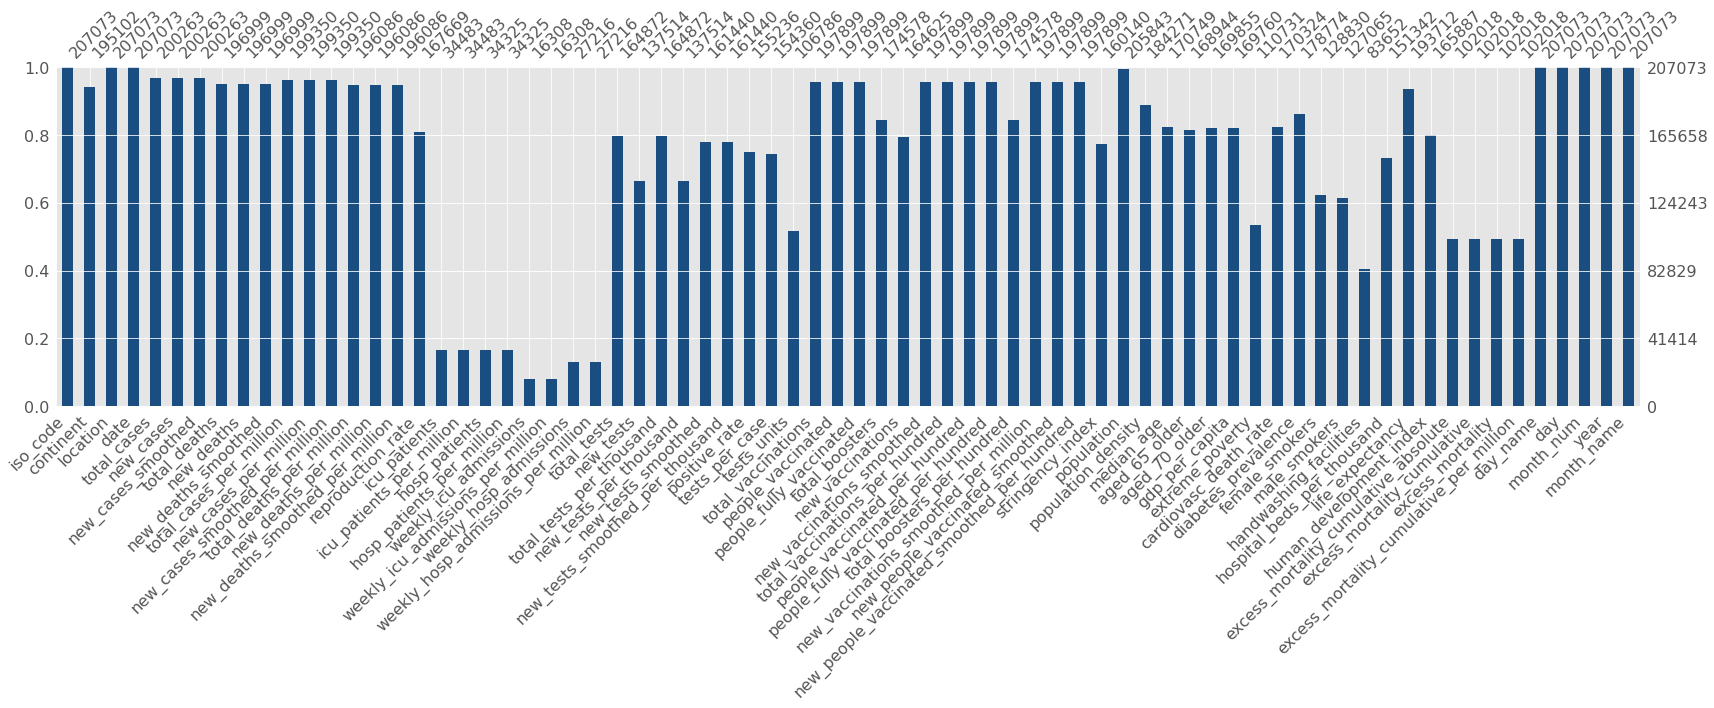

In [37]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5))

<AxesSubplot:>

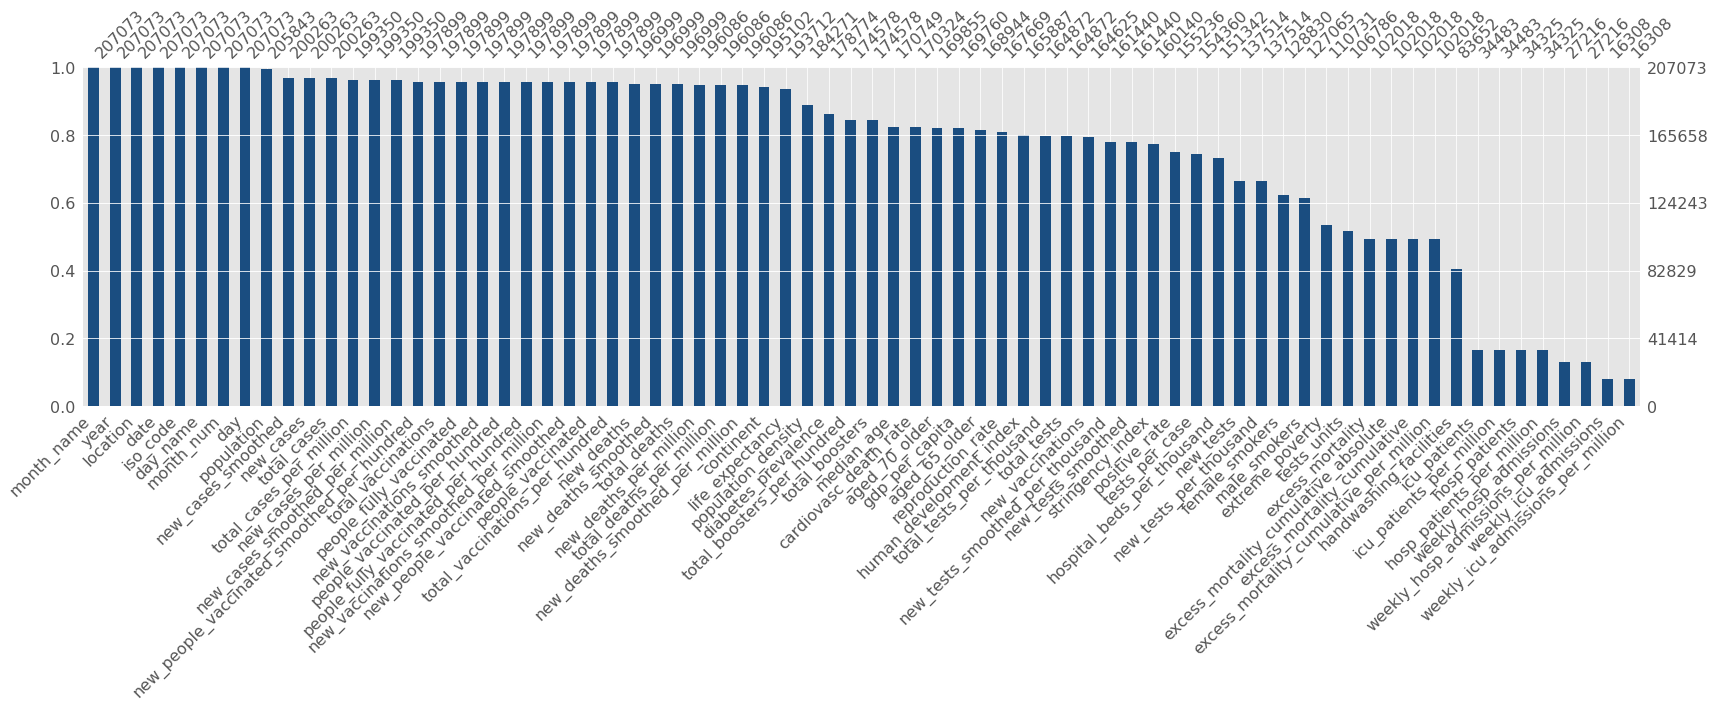

In [38]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5), sort='descending')

In [39]:
df_filled.drop(columns=['day', 'month_num', 'year']).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.00263e+05  2.00263e+05         2.00263e+05   1.96999e+05   
mean   3.80006e+06  1.24772e+04         1.24811e+04   6.41895e+04   
std    2.39262e+07  8.68763e+04         8.46999e+04   3.43379e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.26550e+03  0.00000e+00         6.71400e+00   8.30000e+01   
50%    4.07430e+04  6.40000e+01         9.95710e+01   8.25000e+02   
75%    4.42936e+05  1.01200e+03         1.15486e+03   8.13300e+03   
max    5.84596e+08  4.07947e+06         3.43795e+06   6.41809e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  196999.00000         196999.00000             199350.00000   
mean      136.47209            137.04621              50002.88124   
std       728.21765            711.63862              91331.75065   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                894.27125   
50%         1.00000              1.42900               8122.89300   
75%        14.00000             15.14300              61288.19925   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           199350.00000                    199350.00000   
mean               188.44278                       188.50425   
std                912.92990                       595.15996   
min                  0.00000                         0.00000   
25%                  0.00000                         1.48100   
50%                  9.22150                        20.20900   
75%                103.24375                       137.79413   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              196086.00000            196086.00000   
mean                  619.59580                 1.51230   
std                   900.59057                 5.06018   
min                     0.00000                 0.00000   
25%                    28.15400                 0.00000   
50%                   183.66050                 0.11100   
75%                   926.13950                 1.26700   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     196086.00000       167669.00000   34483.00000   
mean                           1.50424            0.96301     822.76028   
std                            3.33086            0.36995    2400.50121   
min                            0.00000           -0.05000       0.00000   
25%                            0.01200            0.78000      31.00000   
50%                            0.27100            0.98000     148.00000   
75%                            1.63500            1.15000     630.00000   
max                          148.67300            5.86000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               34483.00000    34325.00000                34325.00000   
mean                   21.16691     4373.35054                  157.71484   
std                    24.90326    10805.94229                  184.92340   
min                     0.00000        0.00000                    0.00000   
25%                     4.99366      188.00000                   37.66400   
50%                    11.97700      861.26897                   90.84500   
75%                    30.67050     3796.00000                  211.60300   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            16308.00000                        16308.00000   
mean               287.98807                           12.61916   
std                468.77426                           12.13523   
min             

# Compute Pairwise Correlation

In [40]:
cor_mat = df_filled.drop(columns=['day', 'month_num', 'year']).corr()
cor_mat 

total_cases  new_cases  \
total_cases                                     1.00000    0.73306   
new_cases                                       0.73306    1.00000   
new_cases_smoothed                              0.75522    0.97262   
total_deaths                                    0.93849    0.72902   
new_deaths                                      0.51423    0.64731   
new_deaths_smoothed                             0.53129    0.63399   
total_cases_per_million                         0.09859    0.06610   
new_cases_per_million                           0.01978    0.07298   
new_cases_smoothed_per_million                  0.03108    0.09320   
total_deaths_per_million                        0.12029    0.08149   
new_deaths_per_million                          0.00199    0.02915   
new_deaths_smoothed_per_million                 0.00416    0.03576   
reproduction_rate                               0.01042    0.02838   
icu_patients                                    0.46888    0.53726   
icu_patients_per_million                        0.04112    0.14010   
hosp_patients                                   0.54757    0.67030   
hosp_patients_per_million                       0.01744    0.11965   
weekly_icu_admissions                           0.31717    0.37454   
weekly_icu_admissions_per_million              -0.03962    0.08122   
weekly_hosp_admissions                          0.56373    0.64784   
weekly_hosp_admissions_per_million              0.07252    0.25931   
total_tests                                     0.18268    0.09947   
new_tests                                       0.56277    0.52778   
total_tests_per_thousand                        0.05519    0.04622   
new_tests_per_thousand                         -0.01002    0.03531   
new_tests_smoothed                              0.07844    0.07450   
new_tests_smoothed_per_thousand                 0.00953    0.05696   
positive_rate                                   0.04267    0.14784   
tests_per_case                                 -0.01394   -0.01079   
total_vaccinations                              0.73022    0.55842   
people_vaccinated                               0.70832    0.54843   
people_fully_vaccinated                         0.70879    0.54657   
total_boosters                                  0.67957    0.48149   
new_vaccinations                                0.48666    0.48128   
new_vaccinations_smoothed                       0.50006    0.48637   
total_vaccinations_per_hundred                  0.14659    0.10941   
people_vaccinated_per_hundred                   0.13001    0.09225   
people_fully_vaccinated_per_hundred             0.12251    0.09008   
total_boosters_per_hundred                      0.02820    0.01636   
new_vaccinations_smoothed_per_million          -0.00694    0.01082   
new_people_vaccinated_smoothed                  0.41568    0.38955   
new_people_vaccinated_smoothed_per_hundred     -0.02956   -0.02358   
stringency_index                               -0.05384    0.01675   
population                                      0.61188    0.53839   
population_density                             -0.01630   -0.01480   
median_age                                      0.03639    0.04239   
aged_65_older                                   0.03576    0.04334   
aged_70_older                                   0.03385    0.04261   
gdp_per_capita                                  0.01492    0.01916   
extreme_poverty                                -0.03602   -0.03518   
cardiovasc_death_rate                          -0.03982   -0.04398   
diabetes_prevalence                             0.00480    0.00078   
female_smokers                                  0.00138    0.00657   
male_smokers                                   -0.00391    0.00025   
handwashing_facilities                          0.03206    0.03025   
hospital_beds_per_thousand                      0.00051    0.01288   
life_expectancy                                 0.0175

In [41]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.00000
total_cases                                   0.93849
excess_mortality_cumulative_absolute          0.76376
new_cases_smoothed                            0.74768
total_vaccinations                            0.74173
people_vaccinated                             0.73564
new_cases                                     0.72902
people_fully_vaccinated                       0.71976
population                                    0.70034
new_deaths_smoothed                           0.68343
weekly_hosp_admissions                        0.66620
new_deaths                                    0.66227
hosp_patients                                 0.64557
new_vaccinations_smoothed                     0.63277
new_vaccinations                              0.61866
icu_patients                                  0.61828
total_boosters                                0.61025
new_people_vaccinated_smoothed                0.55835
new_tests                   

<AxesSubplot:>

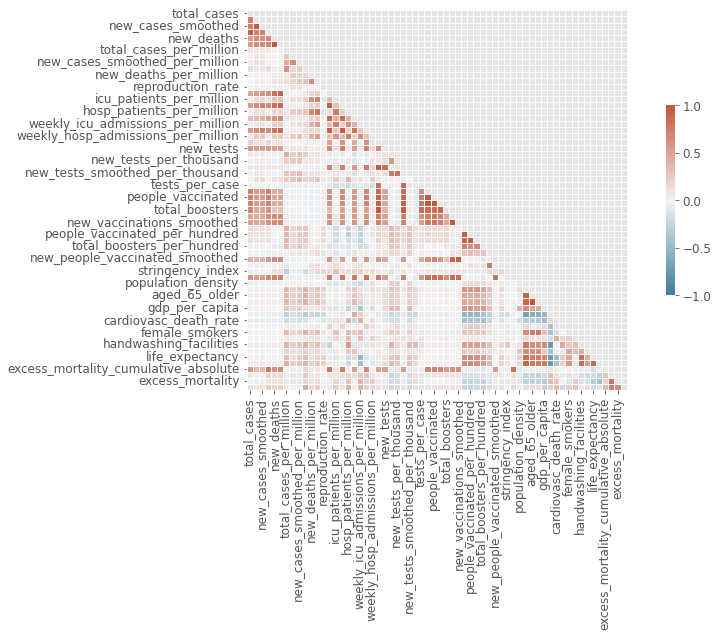

In [42]:
mask = np.triu(np.ones_like(cor_mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Check Duplication

In [43]:
df_filled.duplicated().sum()

0

# Exploratory Data Analysis

Create helper functions to visualize datasets

In [44]:
from matplotlib.ticker import FuncFormatter

# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color, 
        hue_order=hue_order, order=order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        hue_order=hue_order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, 
        hue=hue, hue_order=hue_order, palette=palette,
        ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [45]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',\
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_cases_per_million  new_cases_per_million  \
0           209.95049                    0.125                  0.125   
1           209.95049                    0.125                  0.000   
2           209.95049                    0.125                  0.000   
3           209.95049                    0.125                  0.000   
4           209.95049                    0.125                  0.000   

   new_cases_smoothed_per_million  year  month_num month_name  day   day_name  
0                         5.23575  2020          2        Feb   24     Monday  
1                         5.23575  2020          2        Feb   25    Tuesday  
2                         5.23575  2020          2        Feb   26  Wednesday  
3                         5.23575  2020          2        Feb   27   Thursday  
4                         5.23575  2020          2        Feb   28     Friday

In [46]:
df_cases.drop(columns=['year', 'month_num', 'day', 'day_name']).describe()

total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  2.00263e+05  2.00263e+05         2.00263e+05             199350.00000   
mean   3.80006e+06  1.24772e+04         1.24811e+04              50002.88124   
std    2.39262e+07  8.68763e+04         8.46999e+04              91331.75065   
min    1.00000e+00  0.00000e+00         0.00000e+00                  0.00100   
25%    3.26550e+03  0.00000e+00         6.71400e+00                894.27125   
50%    4.07430e+04  6.40000e+01         9.95710e+01               8122.89300   
75%    4.42936e+05  1.01200e+03         1.15486e+03              61288.19925   
max    5.84596e+08  4.07947e+06         3.43795e+06             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  
count           199350.00000                    199350.00000  
mean               188.44278                       188.50425  
std                912.92990                       595.15996  
min                  0.00000                         0.00000  
25%                  0.00000                         1.48100  
50%                  9.22150                        20.20900  
75%                103.24375                       137.79413  
max             195005.31300                     35258.84300

In [47]:
df_cases.isna().sum()                                   # check missing values

iso_code                              0
continent                         11971
location                              0
date                                  0
total_cases                        6810
new_cases                          6810
new_cases_smoothed                 6810
total_cases_per_million            7723
new_cases_per_million              7723
new_cases_smoothed_per_million     7723
year                                  0
month_num                             0
month_name                            0
day                                   0
day_name                              0
dtype: int64

<AxesSubplot:>

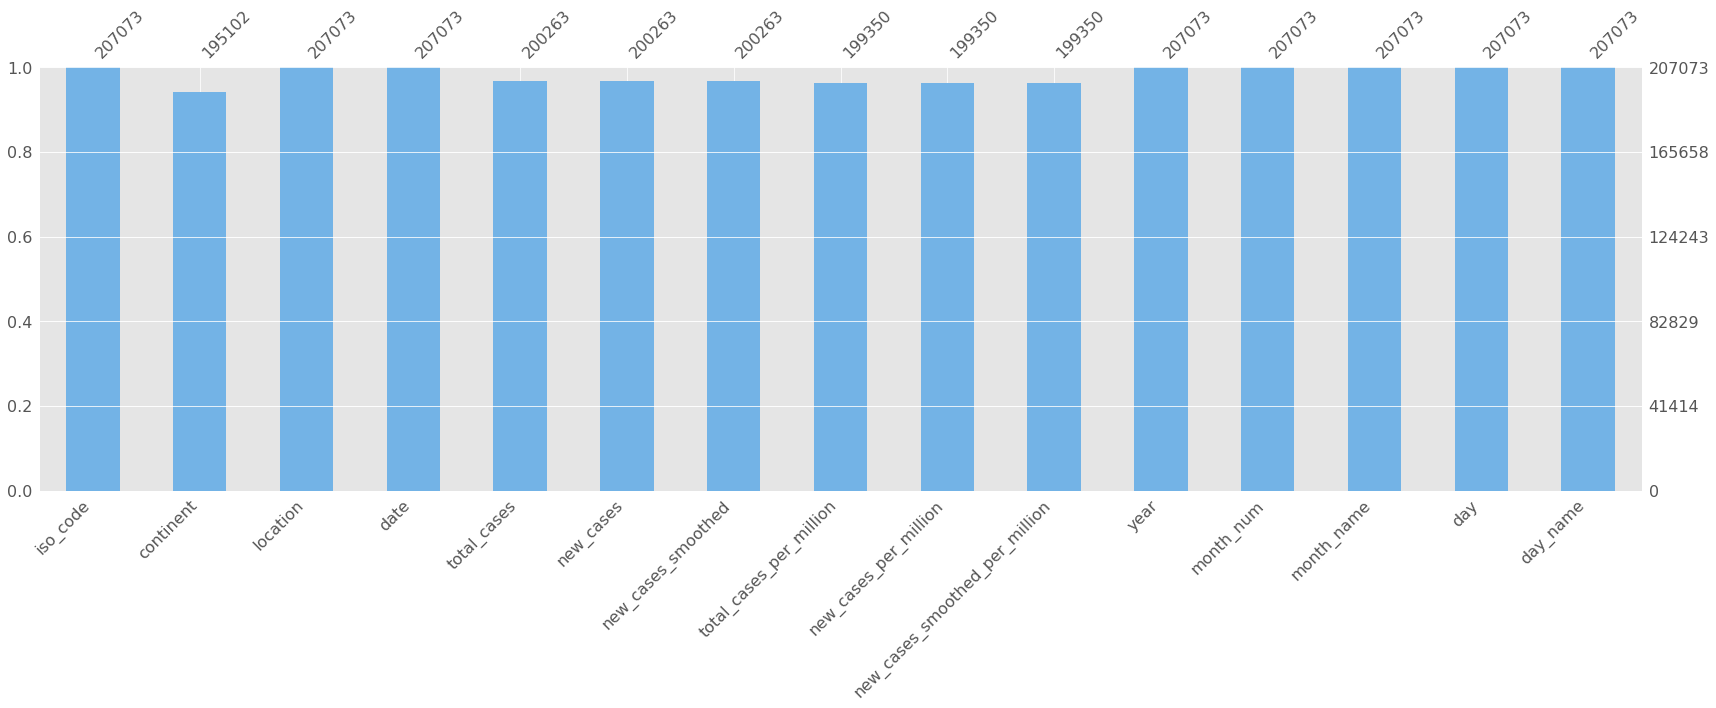

In [48]:
msno.bar(df_cases, labels=True, color=(0.45, 0.70, 0.90))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

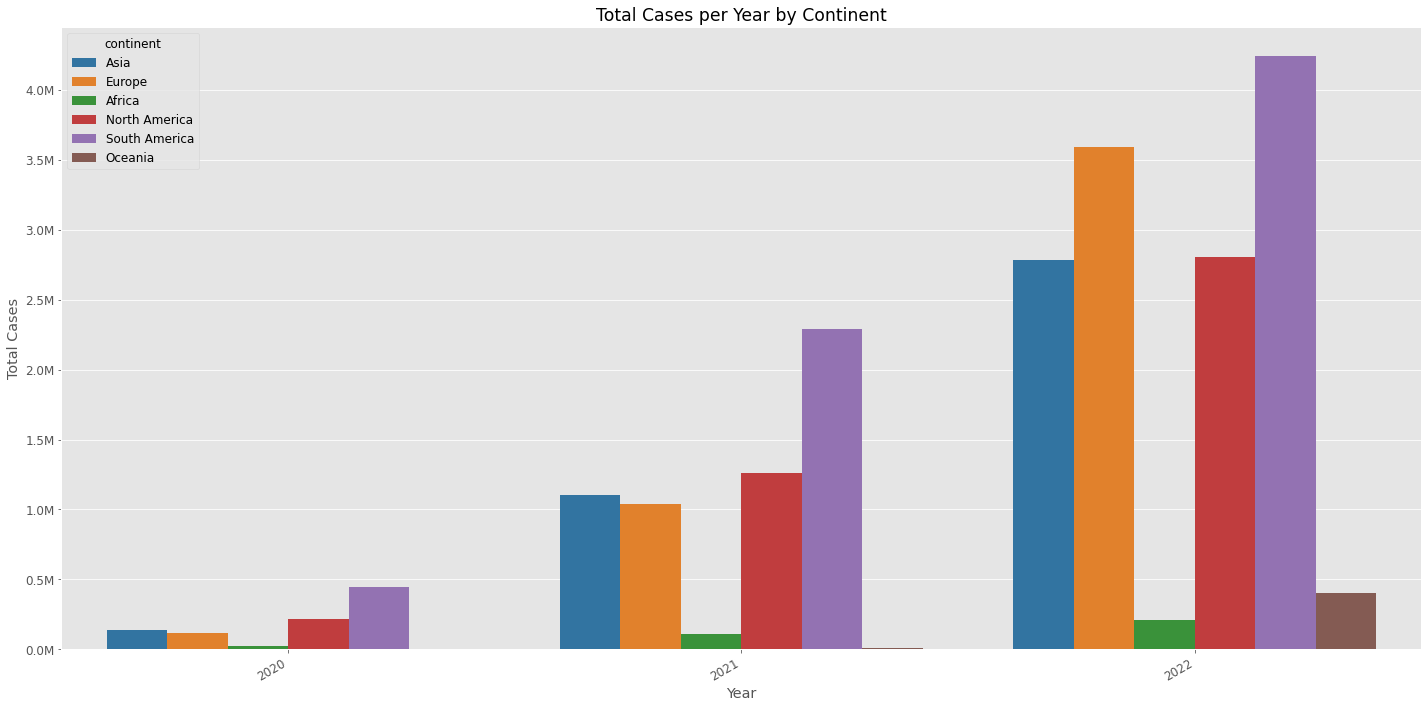

In [49]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', palette='tab10',
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

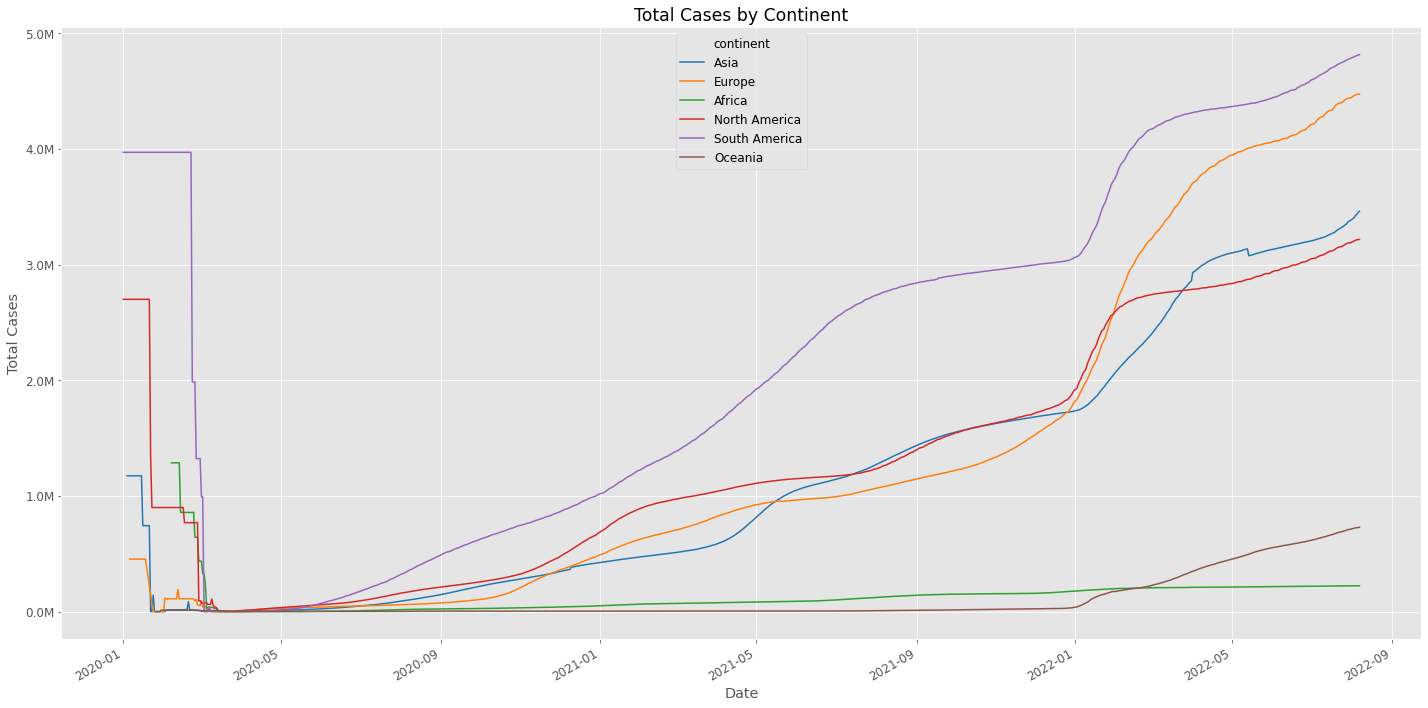

In [50]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', palette='tab10', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

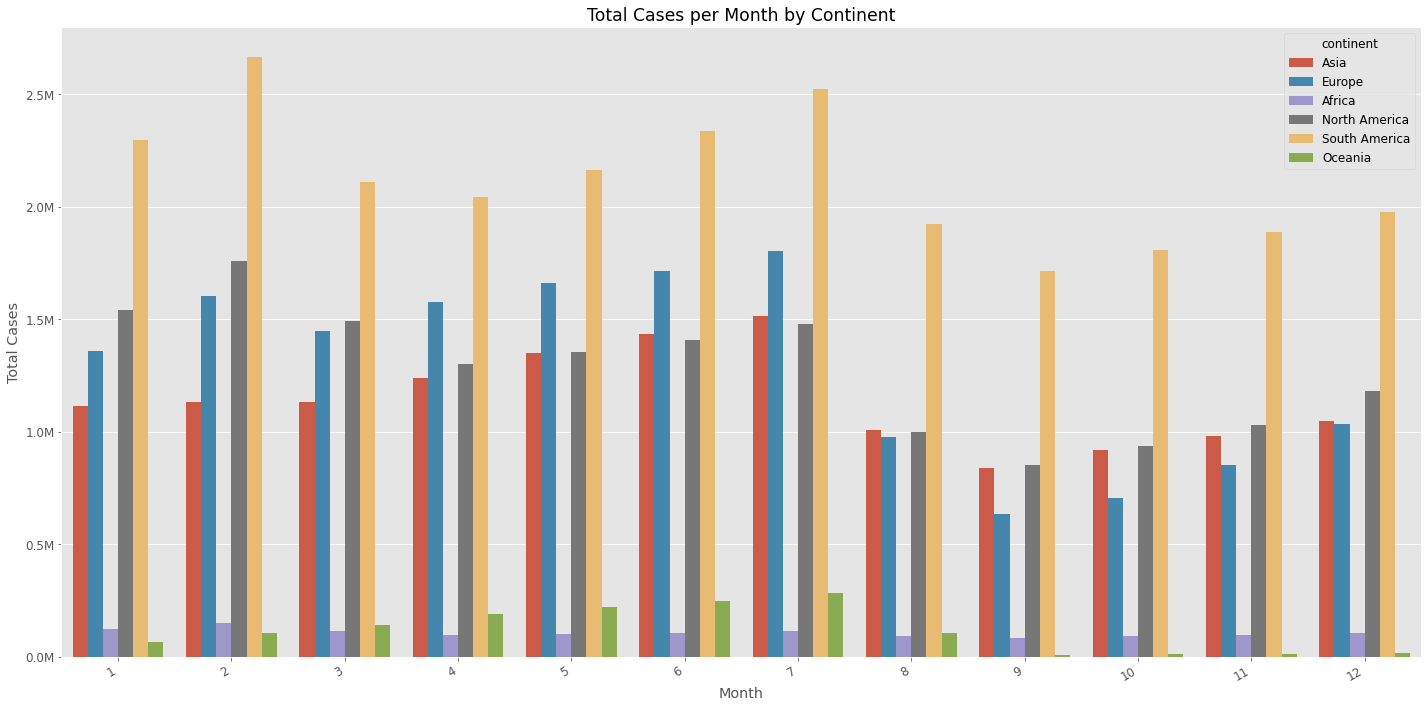

In [51]:
plot_bar(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

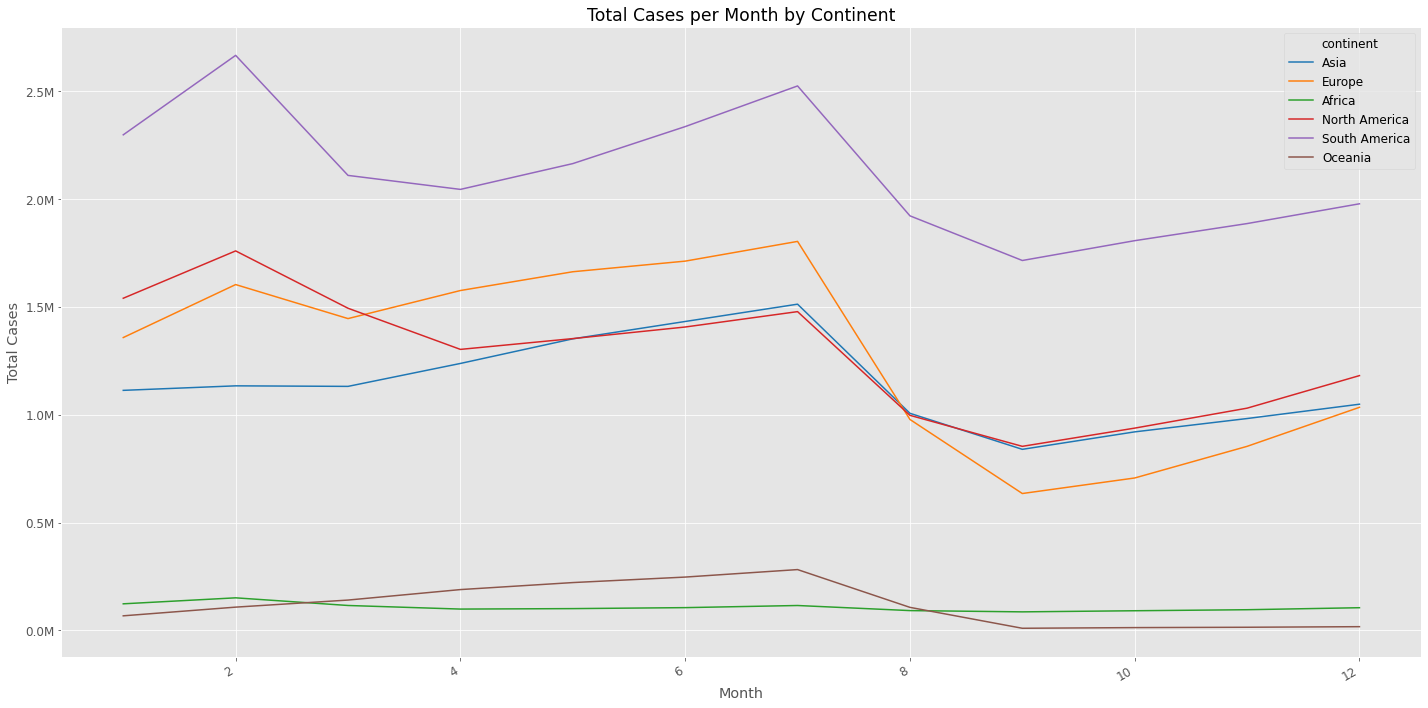

In [52]:
plot_line(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='tab10', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

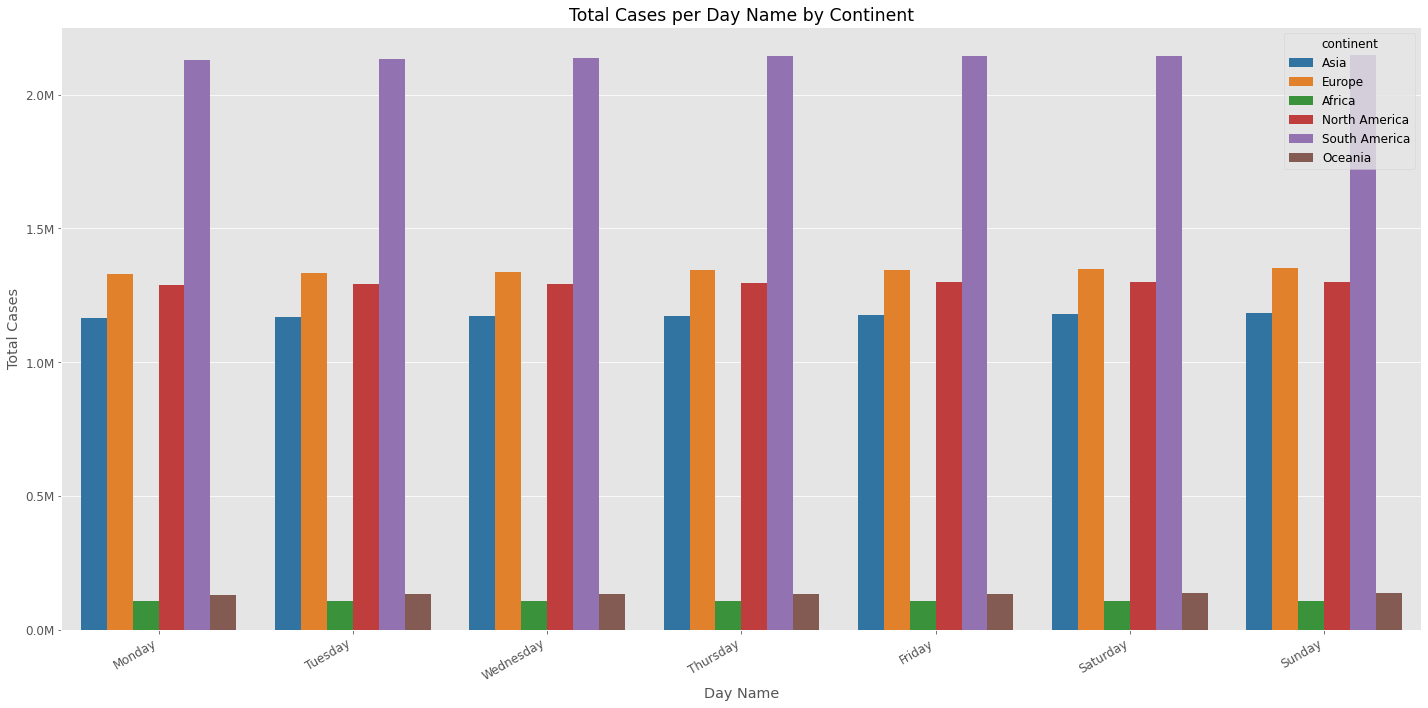

In [53]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', palette='tab10',
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

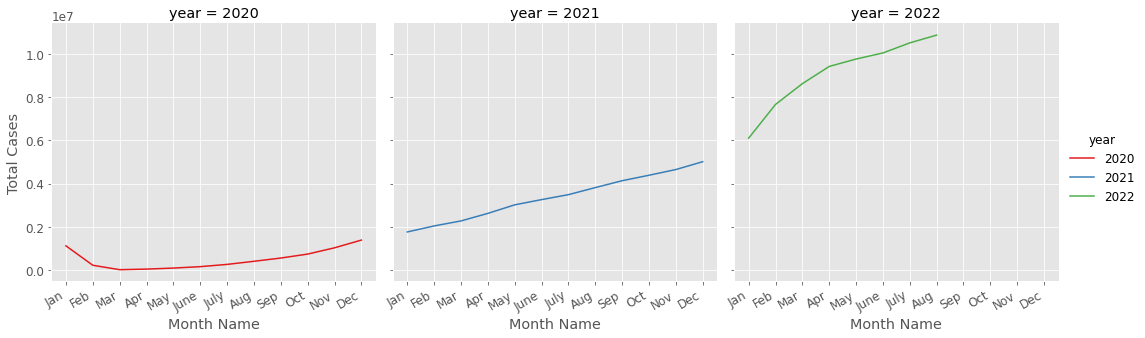

In [54]:
g = sns.relplot(
  data=df_cases,
  x='month_name', y='total_cases', ci=None,
  col='year', hue='year', palette='Set1',
  kind='line'
)

g.set(xlabel='Month Name', ylabel='Total Cases')
g.fig.autofmt_xdate()
ax.yaxis.set_major_formatter(format_mill)

# Deaths Exploration

In [55]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_deaths = df_filled[deaths_cols]
df_deaths.head()

iso_code continent     location       date  total_deaths  new_deaths  \
0      AFG      Asia  Afghanistan 2020-02-24    4315.01152     8.93088   
1      AFG      Asia  Afghanistan 2020-02-25    4315.01152     8.93088   
2      AFG      Asia  Afghanistan 2020-02-26    4315.01152     8.93088   
3      AFG      Asia  Afghanistan 2020-02-27    4315.01152     8.93088   
4      AFG      Asia  Afghanistan 2020-02-28    4315.01152     8.93088   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0              8.98112                 107.60773                 0.22278   
1              8.98112                 107.60773                 0.22278   
2              8.98112                 107.60773                 0.22278   
3              8.98112                 107.60773                 0.22278   
4              8.98112                 107.60773                 0.22278   

   new_deaths_smoothed_per_million  year  month_num month_name  day   day_name  
0                          0.22402  2020          2        Feb   24     Monday  
1                          0.22402  2020          2        Feb   25    Tuesday  
2                          0.22402  2020          2        Feb   26  Wednesday  
3                          0.22402  2020          2        Feb   27   Thursday  
4                          0.22402  2020          2        Feb   28     Friday

In [56]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

total_deaths    new_deaths  new_deaths_smoothed  \
count   1.96999e+05  196999.00000         196999.00000   
mean    6.41895e+04     136.47209            137.04621   
std     3.43379e+05     728.21765            711.63862   
min     1.00000e+00       0.00000              0.00000   
25%     8.30000e+01       0.00000              0.14300   
50%     8.25000e+02       1.00000              1.42900   
75%     8.13300e+03      14.00000             15.14300   
max     6.41809e+06   18191.00000          14817.14300   

       total_deaths_per_million  new_deaths_per_million  \
count              196086.00000            196086.00000   
mean                  619.59580                 1.51230   
std                   900.59057                 5.06018   
min                     0.00000                 0.00000   
25%                    28.15400                 0.00000   
50%                   183.66050                 0.11100   
75%                   926.13950                 1.26700   
max                  6366.12800               553.80300   

       new_deaths_smoothed_per_million  
count                     196086.00000  
mean                           1.50424  
std                            3.33086  
min                            0.00000  
25%                            0.01200  
50%                            0.27100  
75%                            1.63500  
max                          148.67300

In [57]:
df_deaths.isna().sum()                                   # check missing values

iso_code                               0
continent                          11971
location                               0
date                                   0
total_deaths                       10074
new_deaths                         10074
new_deaths_smoothed                10074
total_deaths_per_million           10987
new_deaths_per_million             10987
new_deaths_smoothed_per_million    10987
year                                   0
month_num                              0
month_name                             0
day                                    0
day_name                               0
dtype: int64

<AxesSubplot:>

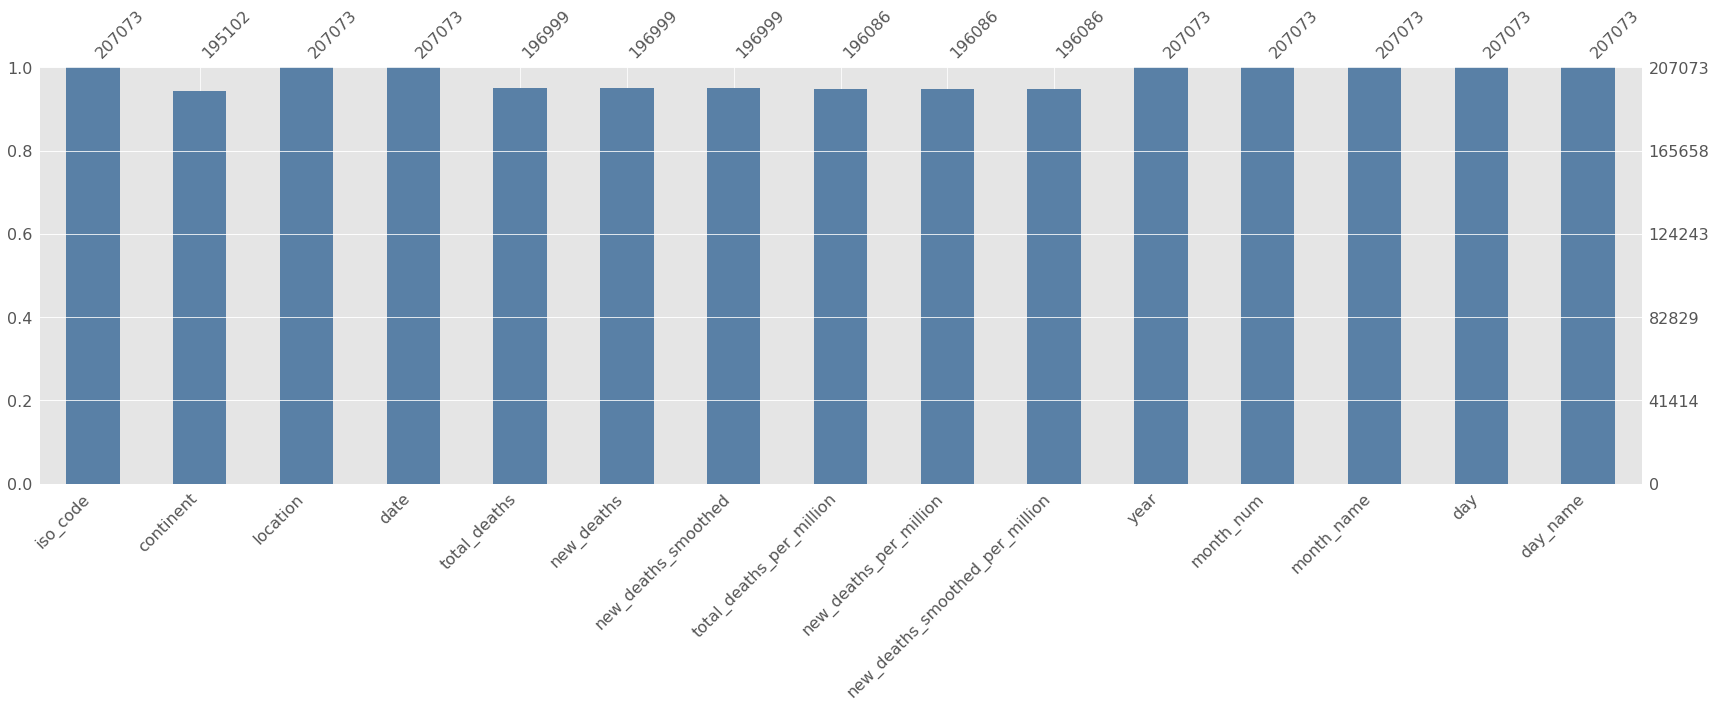

In [58]:
msno.bar(df_deaths, labels=True, color=(0.35, 0.50, 0.65))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

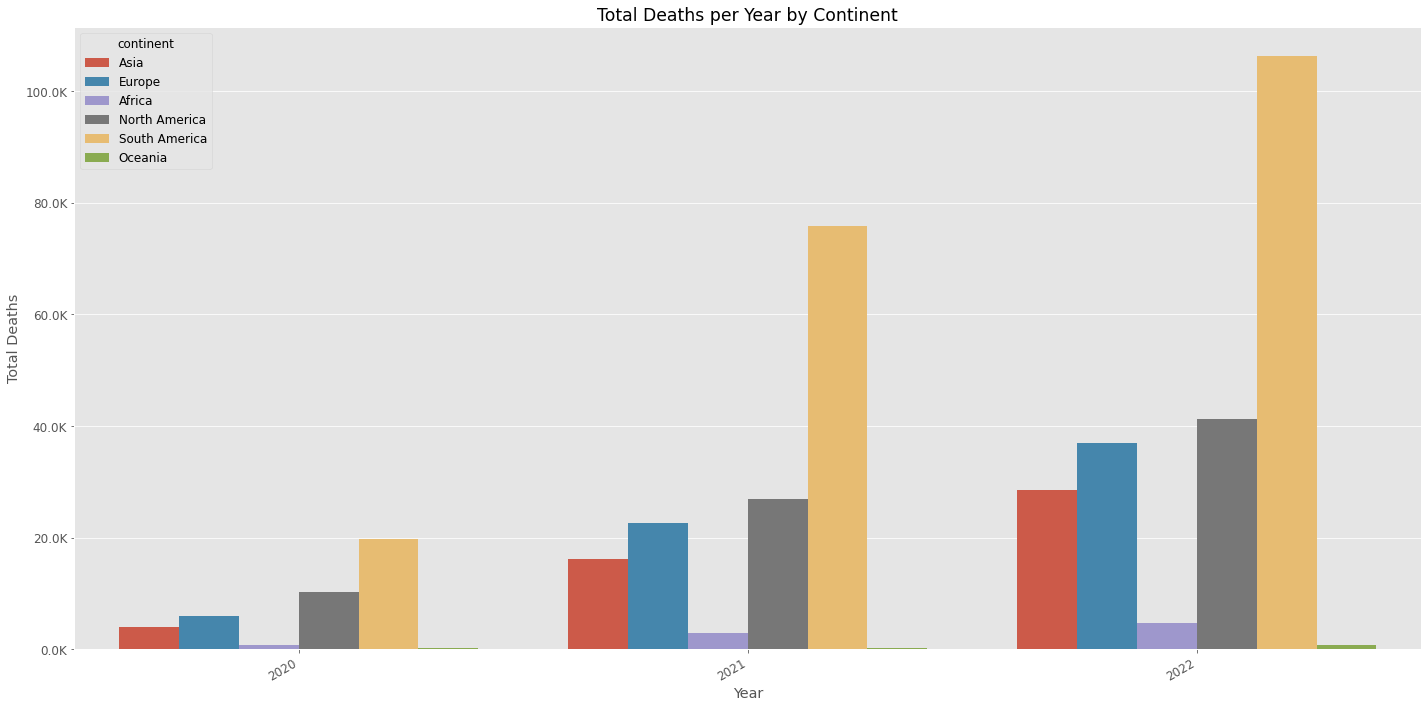

In [59]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

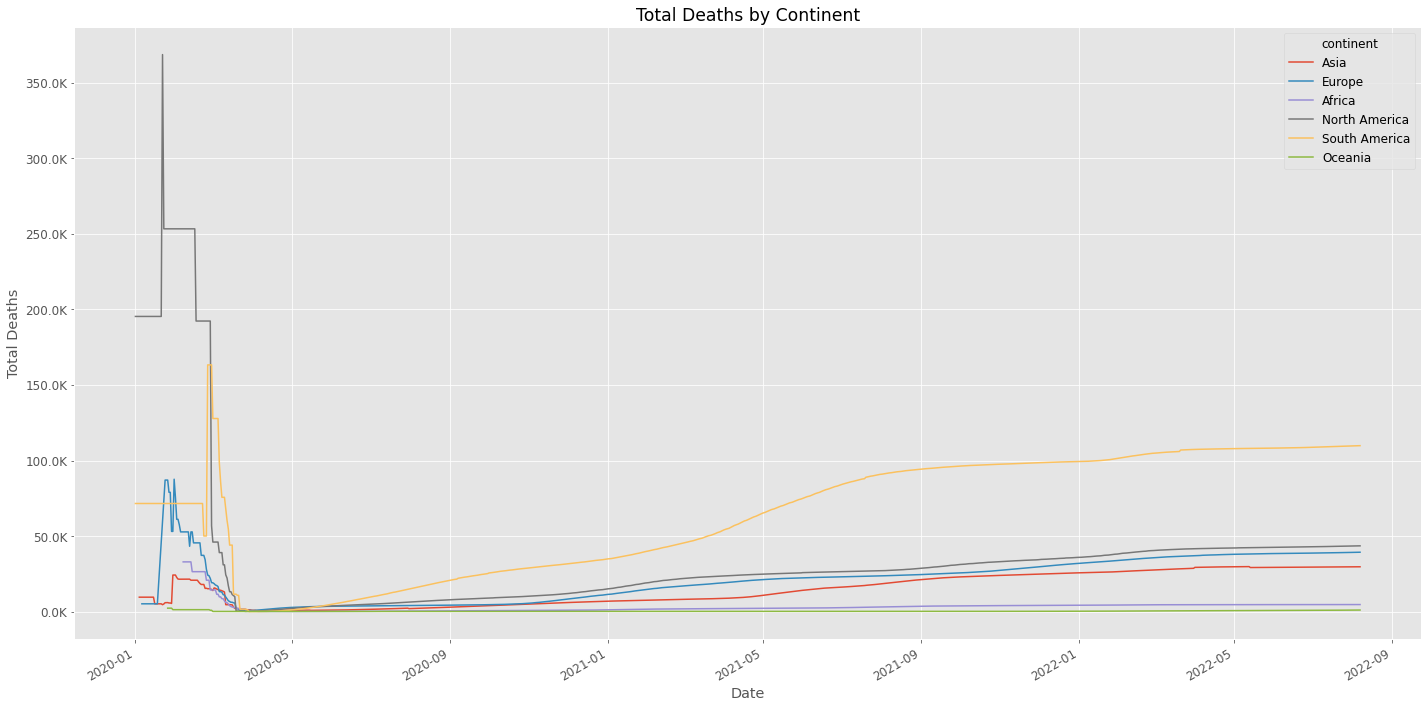

In [60]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', 
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

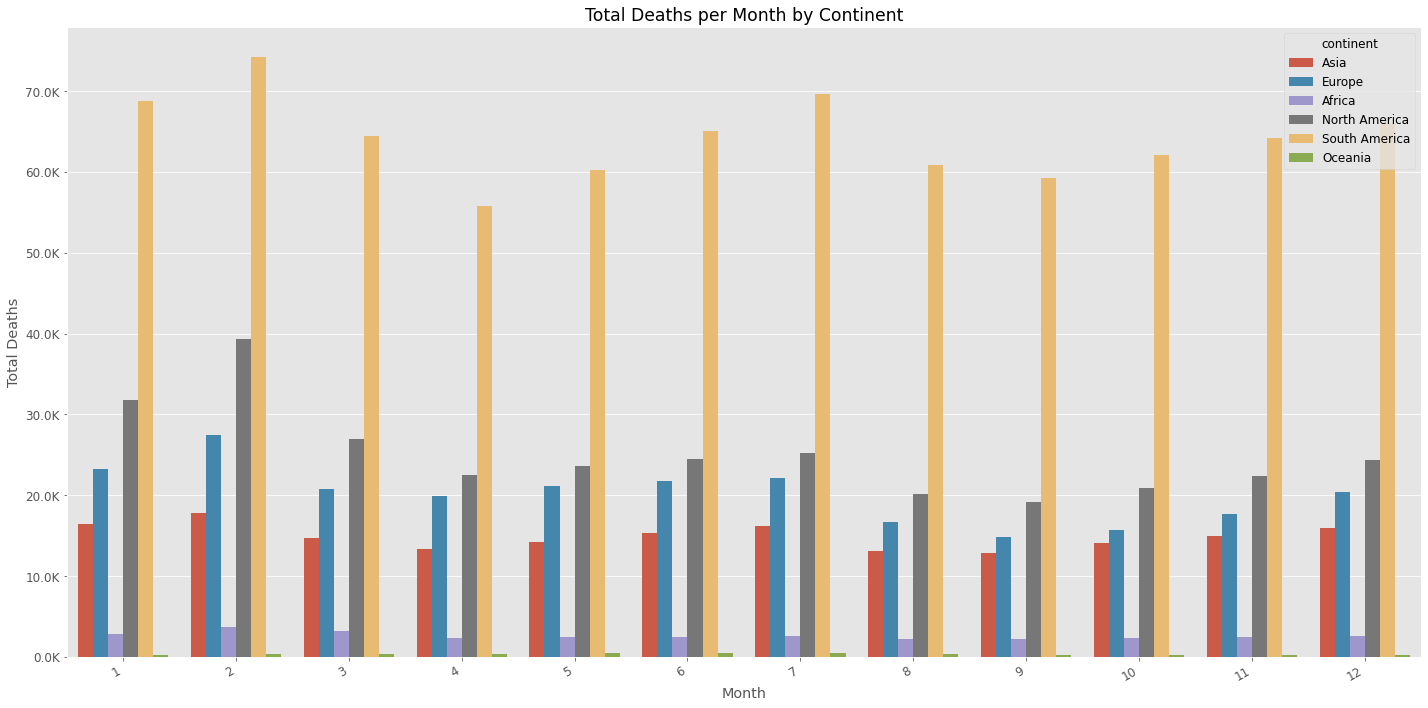

In [61]:
plot_bar(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

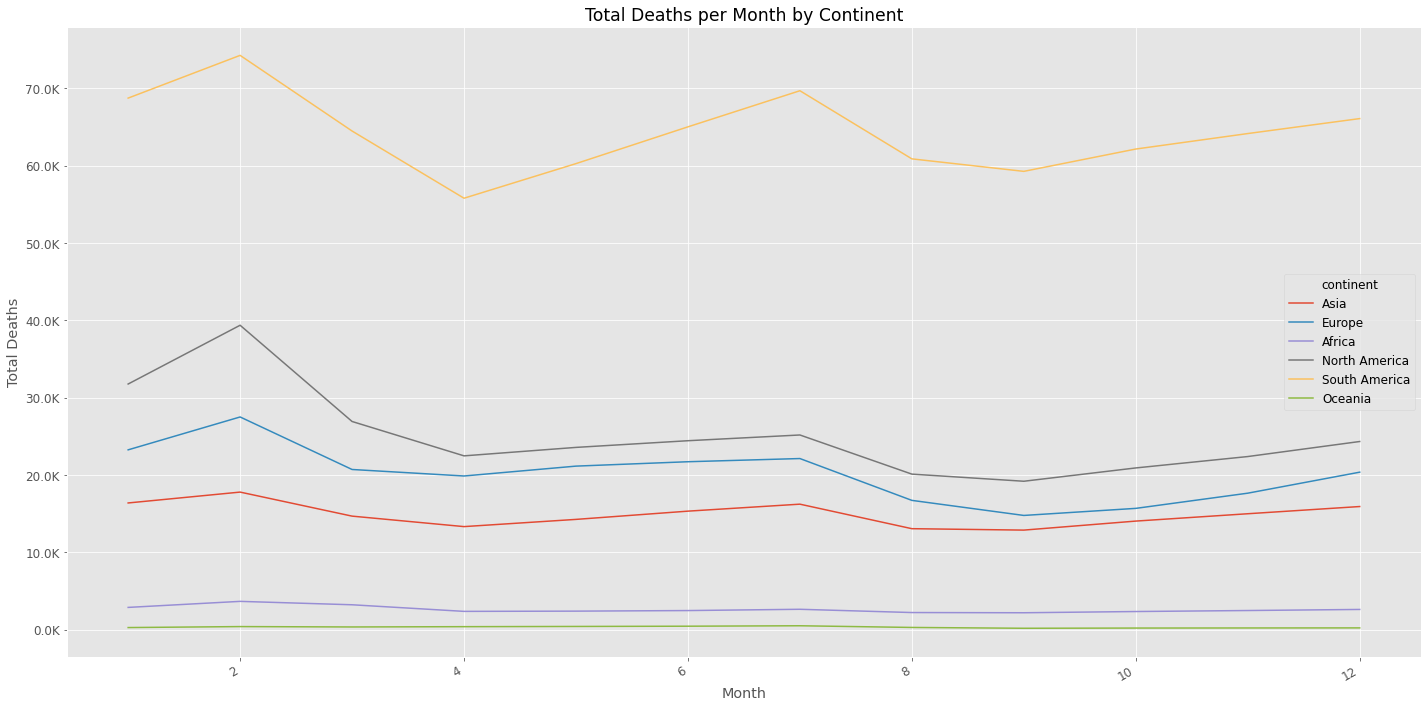

In [62]:
plot_line(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

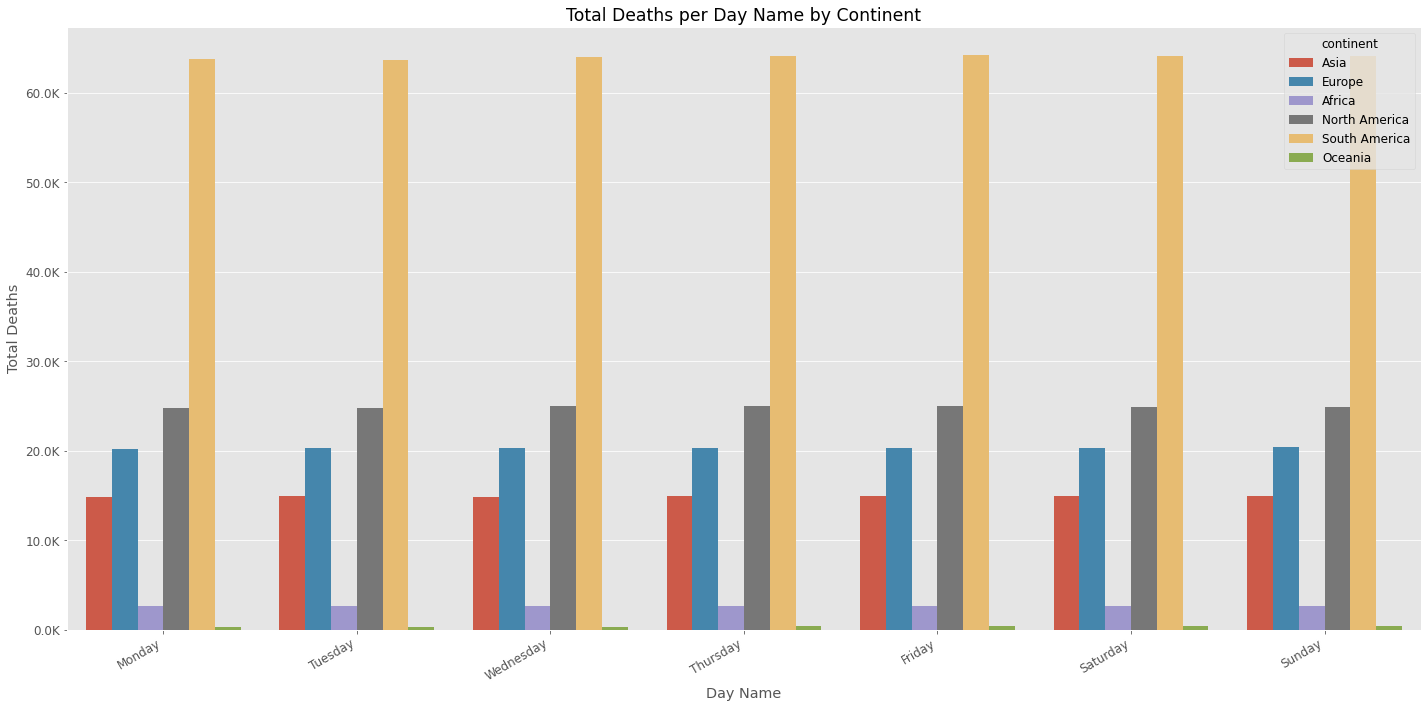

In [63]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', 
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

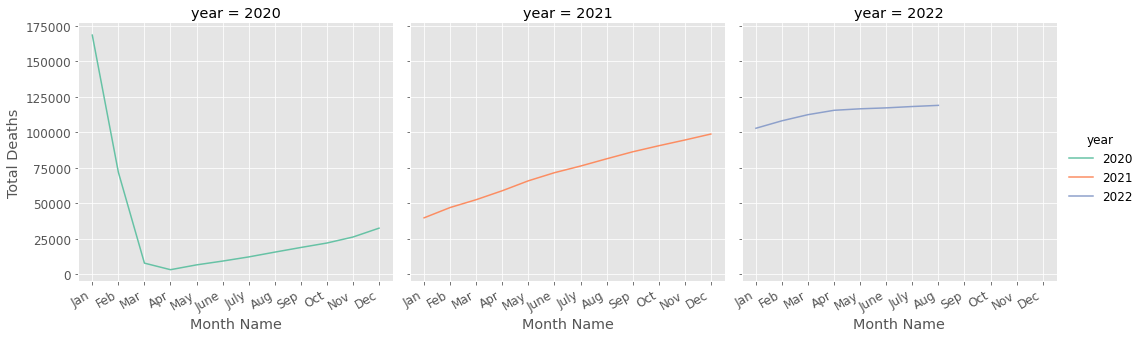

In [64]:
g1 = sns.relplot(
  data=df_deaths,
  x='month_name', y='total_deaths', ci=None, 
  col='year', hue='year', palette='Set2',
  kind='line'
)

g1.set(xlabel='Month Name', ylabel='Total Deaths')
g1.fig.autofmt_xdate()

# Tests Exploration

In [65]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month_num', 
             'month_name', 'day', 'day_name']

df_test = df_filled[test_cols]
df_test.head()

iso_code continent     location       date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan 2020-02-24        NaN     924645.2   
1      AFG      Asia  Afghanistan 2020-02-25        NaN     924645.2   
2      AFG      Asia  Afghanistan 2020-02-26        NaN     924645.2   
3      AFG      Asia  Afghanistan 2020-02-27        NaN     924645.2   
4      AFG      Asia  Afghanistan 2020-02-28        NaN     924645.2   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.2118                     NaN           983.55396   
1                   23.2118                     NaN           983.55396   
2                   23.2118                     NaN           983.55396   
3                   23.2118                     NaN           983.55396   
4                   23.2118                     NaN           983.55396   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                          0.02486        0.12974        19.62899         NaN   
1                          0.02486        0.12974        19.62899         NaN   
2                          0.02486        0.12974        19.62899         NaN   
3                          0.02486        0.12974        19.62899         NaN   
4                          0.02486        0.12974        19.62899         NaN   

   year  month_num month_name  day   day_name  
0  2020          2        Feb   24     Monday  
1  2020          2        Feb   25    Tuesday  
2  2020          2        Feb   26  Wednesday  
3  2020          2        Feb   27   Thursday  
4  2020          2        Feb   28     Friday

In [66]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

new_tests  total_tests  total_tests_per_thousand  \
count  1.37514e+05  1.64872e+05              164872.00000   
mean   4.74750e+04  3.07136e+07                 848.84933   
std    1.93251e+05  2.42637e+08                2195.11297   
min    1.00000e+00  0.00000e+00                   0.00000   
25%    9.74667e+02  1.94217e+05                  35.27075   
50%    4.74900e+03  9.24645e+05                 184.12550   
75%    2.28042e+04  5.32113e+06                 713.95975   
max    3.58556e+07  9.21400e+09               32925.90000   

       new_tests_per_thousand  new_tests_smoothed  \
count            137514.00000         1.61440e+05   
mean                  3.64038         1.22756e+05   
std                   9.28669         1.08238e+06   
min                   0.00000         0.00000e+00   
25%                   0.27300         6.39000e+02   
50%                   0.95900         3.45900e+03   
75%                   2.88400         2.17462e+04   
max                 534.01300         1.47700e+07   

       new_tests_smoothed_per_thousand  positive_rate  tests_per_case  
count                     161440.00000   155236.00000     1.54360e+05  
mean                           2.91922        0.09412     2.16810e+03  
std                            7.28076        0.10418     2.97124e+04  
min                            0.00000        0.00000     1.00000e+00  
25%                            0.15300        0.01878     1.00000e+01  
50%                            0.77800        0.06391     2.68624e+01  
75%                            2.63200        0.12974     8.00000e+01  
max                          147.60300        1.00000     1.02363e+06

In [67]:
df_test.isna().sum()                                   # check missing values

iso_code                                0
continent                           11971
location                                0
date                                    0
new_tests                           69559
total_tests                         42201
total_tests_per_thousand            42201
new_tests_per_thousand              69559
new_tests_smoothed                  45633
new_tests_smoothed_per_thousand     45633
positive_rate                       51837
tests_per_case                      52713
tests_units                        100287
year                                    0
month_num                               0
month_name                              0
day                                     0
day_name                                0
dtype: int64

<AxesSubplot:>

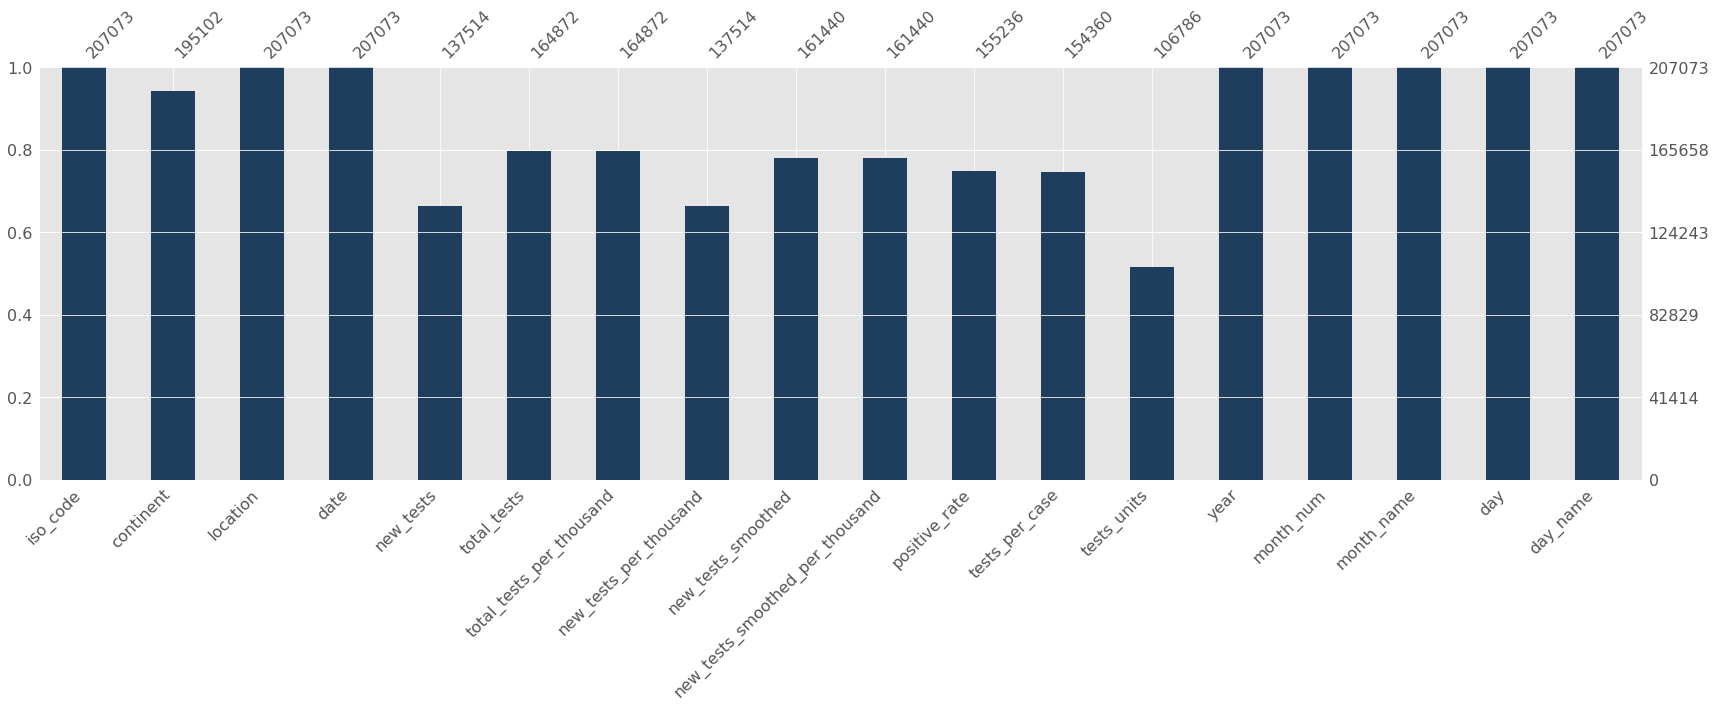

In [68]:
msno.bar(df_test, labels=True, color=(0.12, 0.24, 0.36))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

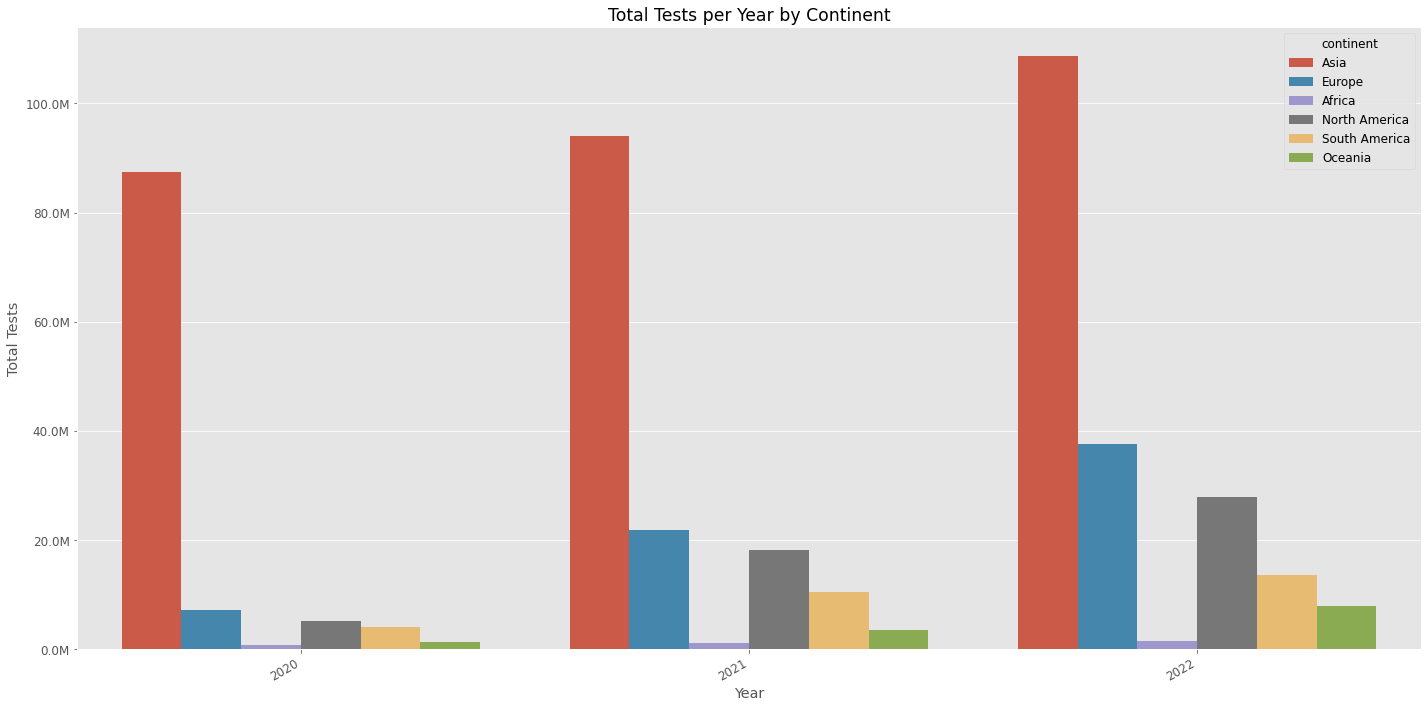

In [69]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', 
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

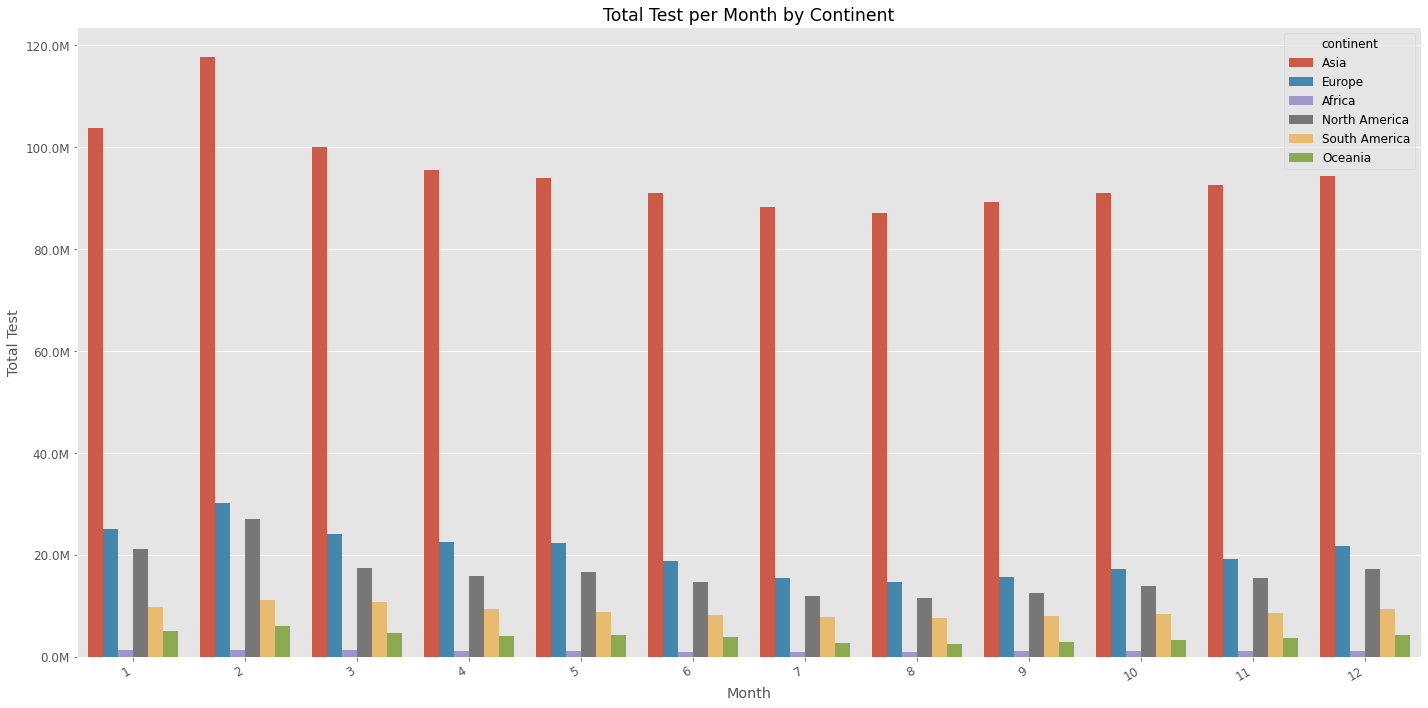

In [70]:
plot_bar(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

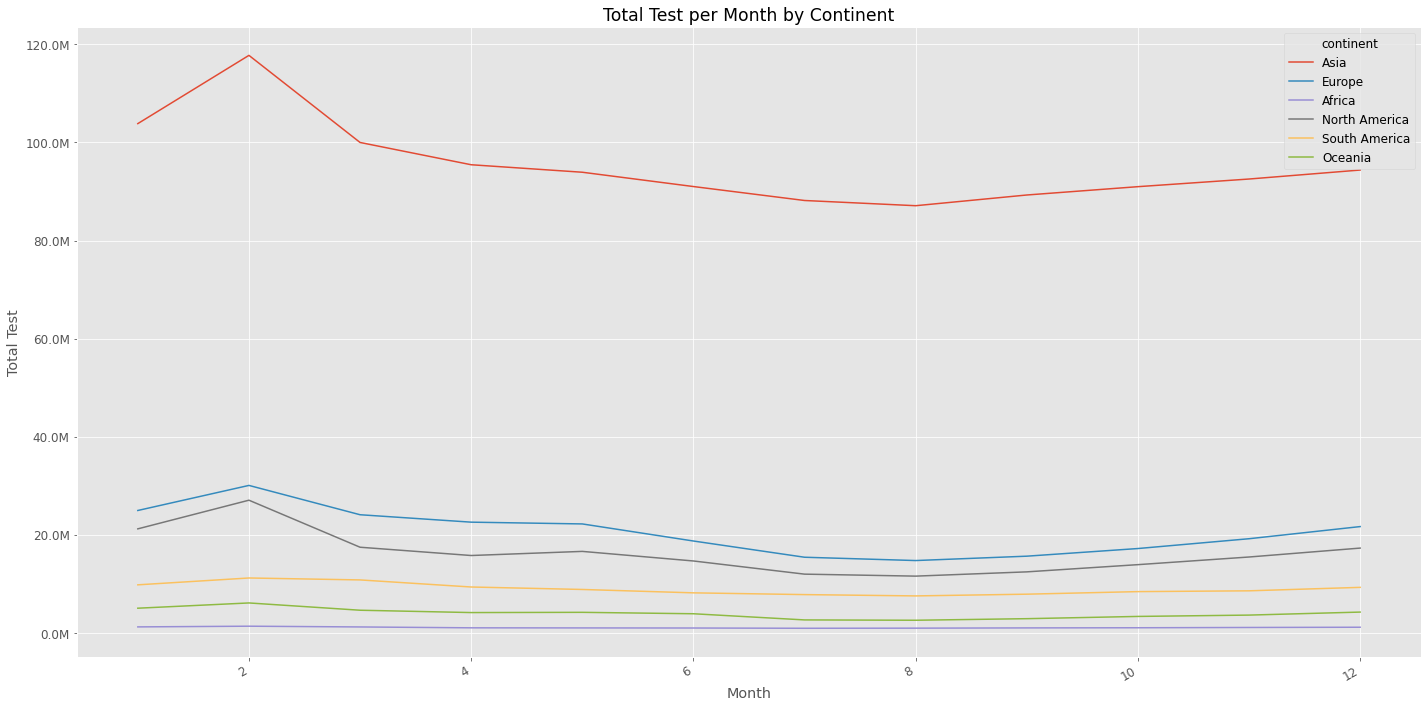

In [71]:
plot_line(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

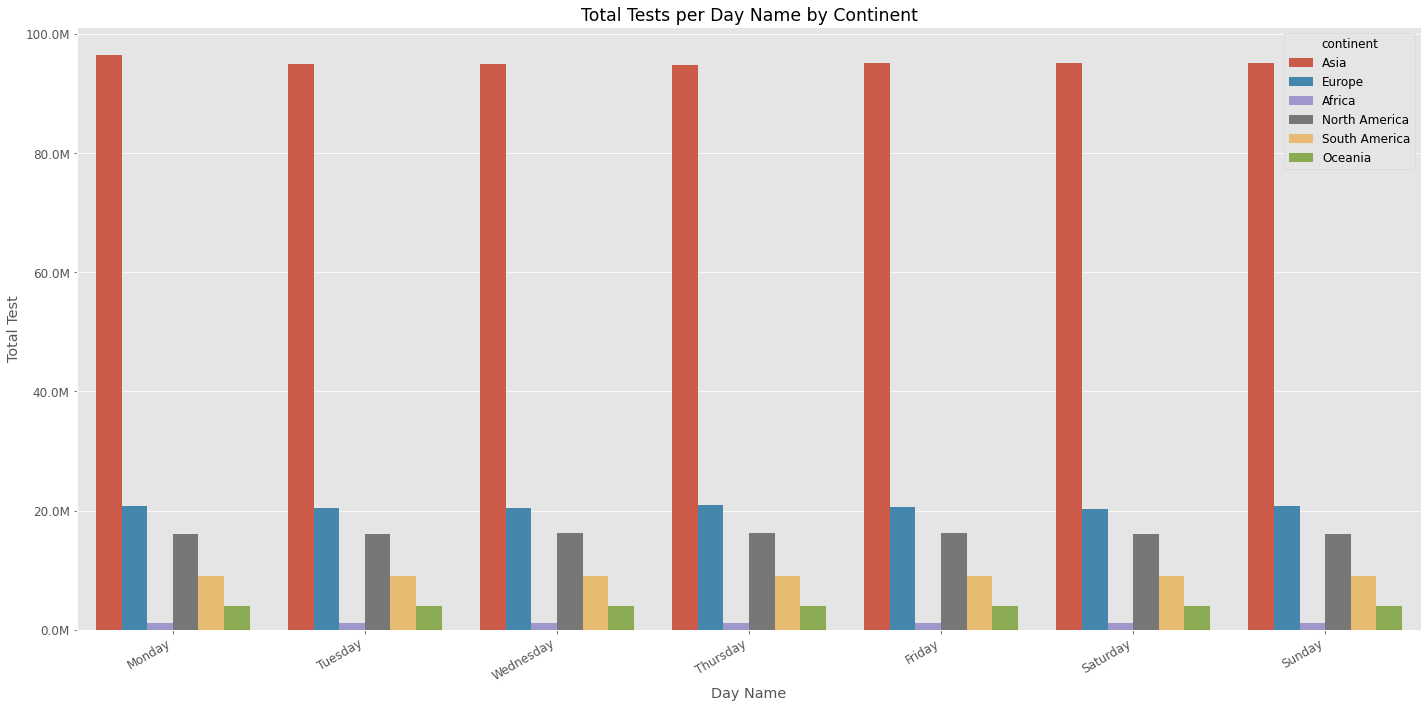

In [72]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', 
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

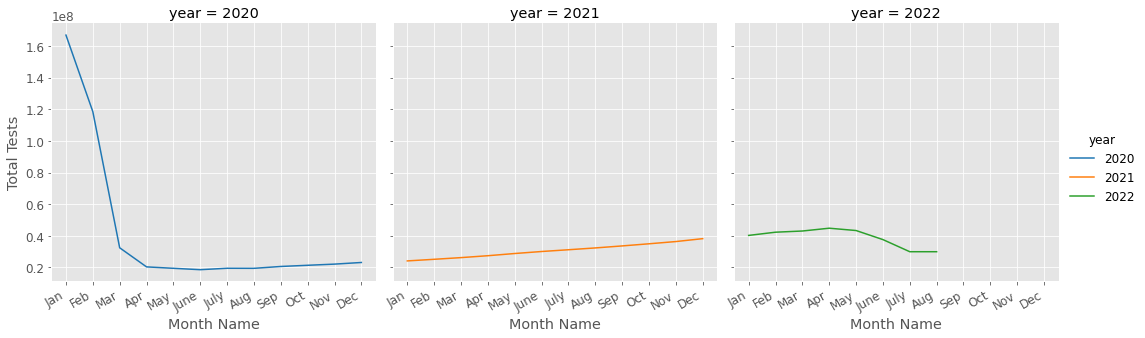

In [73]:
g2 = sns.relplot(
  data=df_test,
  x='month_name', y='total_tests', ci=None,
  col='year', hue='year', palette='tab10',
  kind='line'
)

g2.set(xlabel='Month Name', ylabel='Total Tests')
g2.fig.autofmt_xdate()

# Vaccinations Exploration

In [74]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month_num', 'month_name', 'day', 'day_name']

df_vacc = df_filled[vacc_cols]
df_vacc.head()

iso_code continent     location       date  total_vaccinations  \
0      AFG      Asia  Afghanistan 2020-02-24         3.67439e+06   
1      AFG      Asia  Afghanistan 2020-02-25         3.67439e+06   
2      AFG      Asia  Afghanistan 2020-02-26         3.67439e+06   
3      AFG      Asia  Afghanistan 2020-02-27         3.67439e+06   
4      AFG      Asia  Afghanistan 2020-02-28         3.67439e+06   

   people_vaccinated  people_fully_vaccinated  total_boosters  \
0        3.27439e+06              3.09986e+06             NaN   
1        3.27439e+06              3.09986e+06             NaN   
2        3.27439e+06              3.09986e+06             NaN   
3        3.27439e+06              3.09986e+06             NaN   
4        3.27439e+06              3.09986e+06             NaN   

   new_vaccinations  new_vaccinations_smoothed  \
0           3531.25                   15358.35   
1           3531.25                   15358.35   
2           3531.25                   15358.35   
3           3531.25                   15358.35   
4           3531.25                   15358.35   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                         9.16323                        8.16557   
1                         9.16323                        8.16557   
2                         9.16323                        8.16557   
3                         9.16323                        8.16557   
4                         9.16323                        8.16557   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                              7.73019                         NaN   
1                              7.73019                         NaN   
2                              7.73019                         NaN   
3                              7.73019                         NaN   
4                              7.73019                         NaN   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                              383.06346                     13924.14808   
1                              383.06346                     13924.14808   
2                              383.06346                     13924.14808   
3                              383.06346                     13924.14808   
4                              383.06346                     13924.14808   

   new_people_vaccinated_smoothed_per_hundred  year  month_num month_name  \
0                                     0.03478  2020          2        Feb   
1                                     0.03478  2020          2        Feb   
2                                     0.03478  2020          2        Feb   
3                                     0.03478  2020          2        Feb   
4                                     0.03478  2020          2        Feb   

   day   day_name  
0   24     Monday  
1   25    Tuesday  
2   26  Wednesday  
3   27   Thursday  
4   28     Friday

In [75]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count         1.97899e+05        1.97899e+05              1.97899e+05   
mean          1.21550e+08        6.01695e+07              5.05729e+07   
std           6.87086e+08        3.27191e+08              2.80927e+08   
min           0.00000e+00        0.00000e+00              1.00000e+00   
25%           3.36032e+05        2.12469e+05              1.68225e+05   
50%           2.32182e+06        1.29058e+06              1.22110e+06   
75%           1.37013e+07        7.09986e+06              6.41950e+06   
max           1.24048e+10        5.31121e+09              4.88118e+09   

       total_boosters  new_vaccinations  new_vaccinations_smoothed  \
count     1.74578e+05       1.64625e+05                1.97899e+05   
mean      1.88241e+07       4.93430e+05                3.99713e+05   
std       1.03454e+08       2.45363e+06                2.21039e+06   
min       1.00000e+00       0.00000e+00                0.00000e+00   
25%       3.92518e+04       3.08600e+03                1.11375e+03   
50%       4.79754e+05       1.59164e+04                8.20300e+03   
75%       4.02631e+06       9.22823e+04                5.84005e+04   
max       2.30144e+09       4.96671e+07                4.36879e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    197899.00000                   197899.00000   
mean                         74.35810                       37.28020   
std                          58.20190                       24.87200   
min                           0.00000                        0.00000   
25%                          21.92698                       14.58943   
50%                          67.99783                       37.54272   
75%                         111.75000                       55.84533   
max                         366.87000                      128.78000   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
count                         197899.00000                174578.00000   
mean                              32.66596                    18.62942   
std                               23.17171                    18.99729   
min                                0.00000                     0.00000   
25%                               11.82885                     2.22635   
50%                               30.35143                    12.94000   
75%                               49.53484                    29.81672   
max                              126.79000                   134.27000   

       new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count                           197899.00000                     1.97899e+05   
mean                              2777.24417                     1.54614e+05   
std                               3248.09841                     8.83629e+05   
min                                  0.00000                     0.00000e+00   
25%                                651.90792                     4.08000e+02   
50%                               2061.00000                     4.05286e+03   
75%                               3734.00000                     2.36875e+04   
max                             117862.00000                     2.10691e+07   

       new_people_vaccinated_smoothed_per_hundred  
count                                197899.00000  
mean                                      0.12122  
std                                       0.18922  
min                                       0.00000  
25%                                       0.02560  
50%                                       0.08400  
75%                                       0.14447  
max                                      11.78600

In [76]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                          0
continent                                     11971
location                                          0
date                                              0
total_vaccinations                             9174
people_vaccinated                              9174
people_fully_vaccinated                        9174
total_boosters                                32495
new_vaccinations                              42448
new_vaccinations_smoothed                      9174
total_vaccinations_per_hundred                 9174
people_vaccinated_per_hundred                  9174
people_fully_vaccinated_per_hundred            9174
total_boosters_per_hundred                    32495
new_vaccinations_smoothed_per_million          9174
new_people_vaccinated_smoothed                 9174
new_people_vaccinated_smoothed_per_hundred     9174
year                                              0
month_num                                         0
month_name  

<AxesSubplot:>

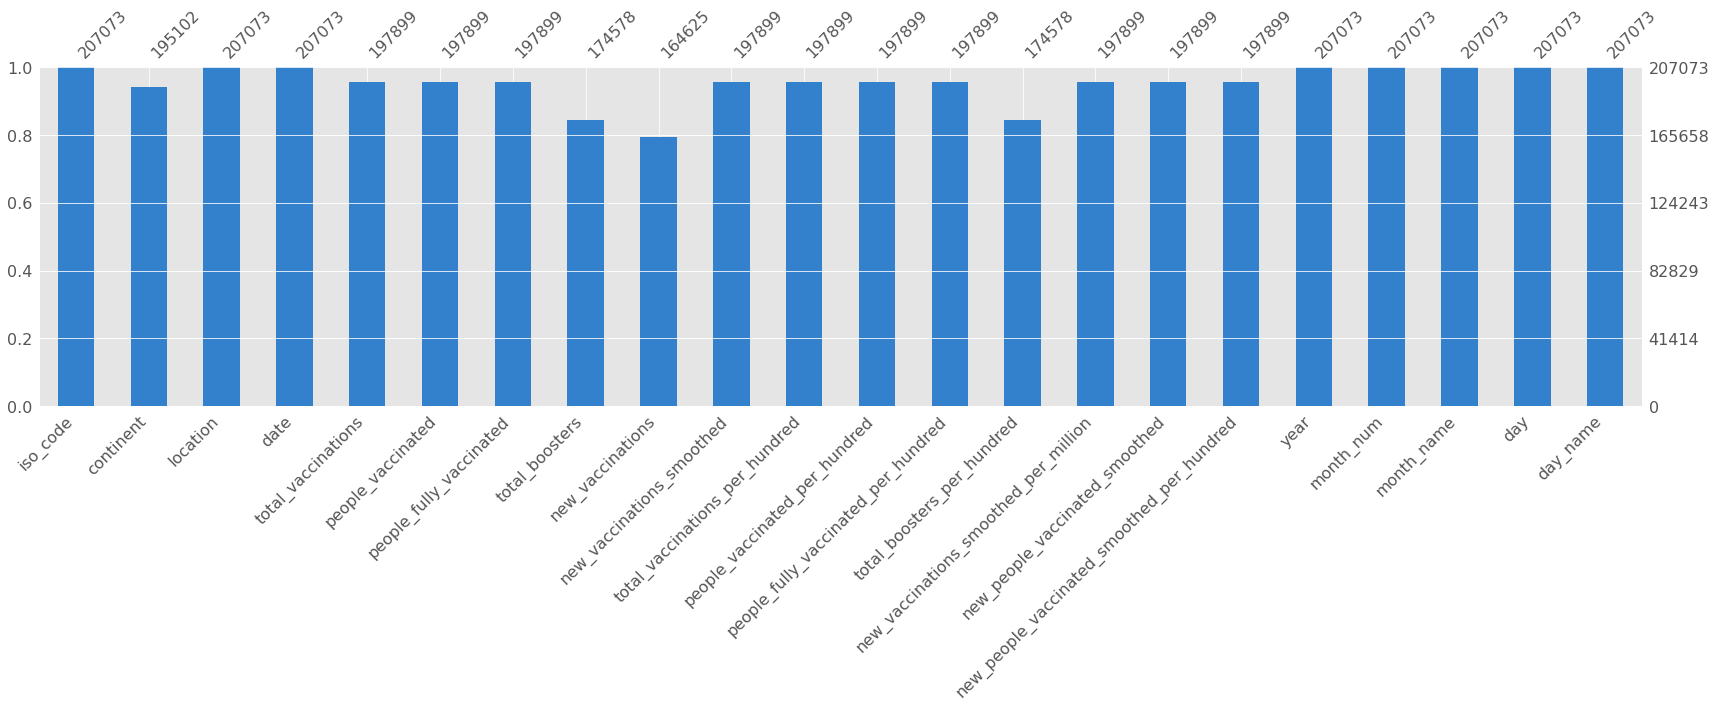

In [77]:
msno.bar(df_vacc, labels=True, color=(0.20, 0.50, 0.80))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

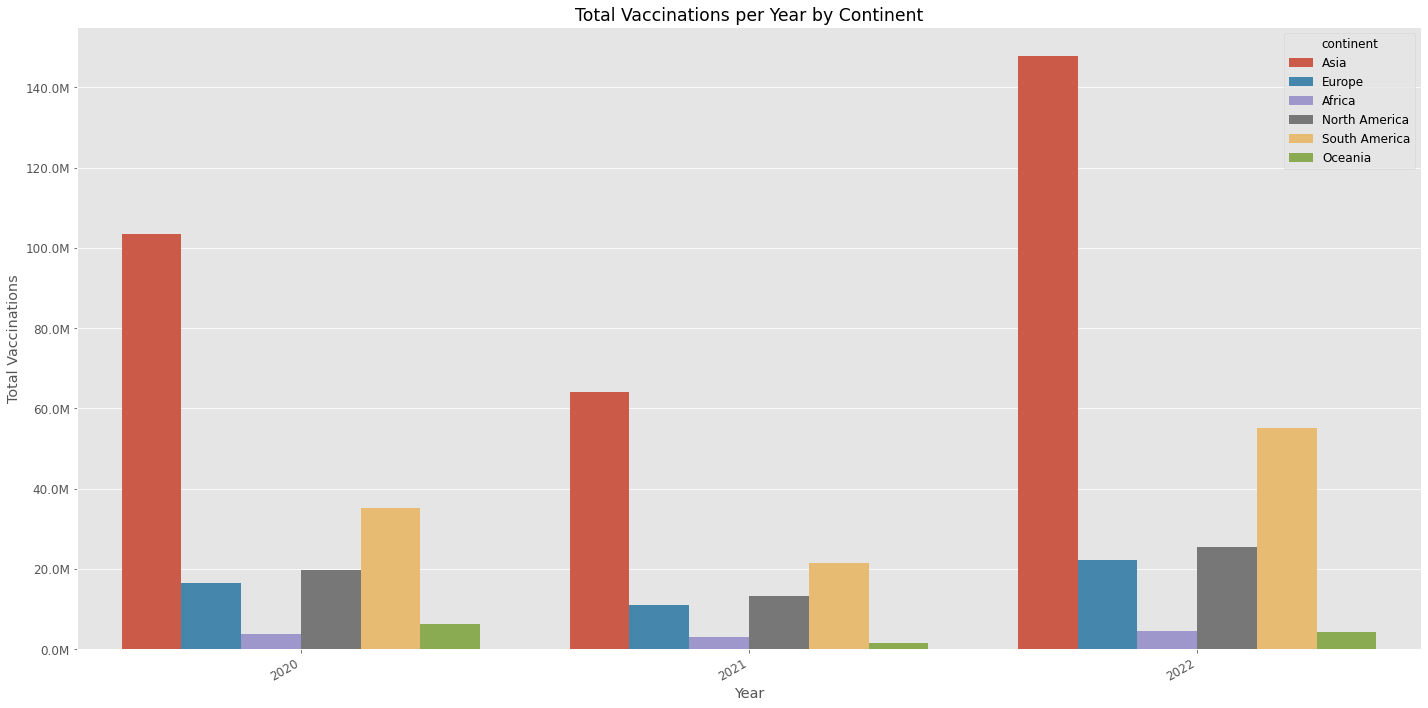

In [78]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

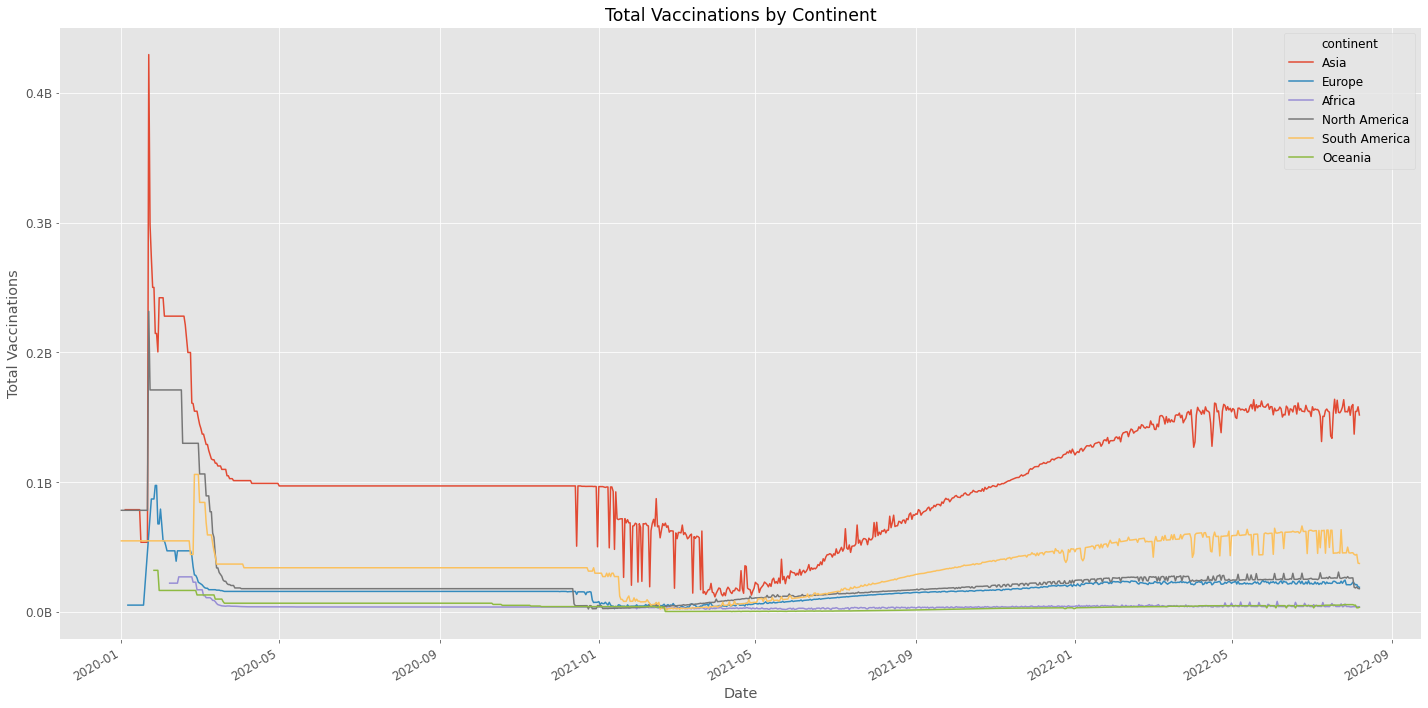

In [79]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_bill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

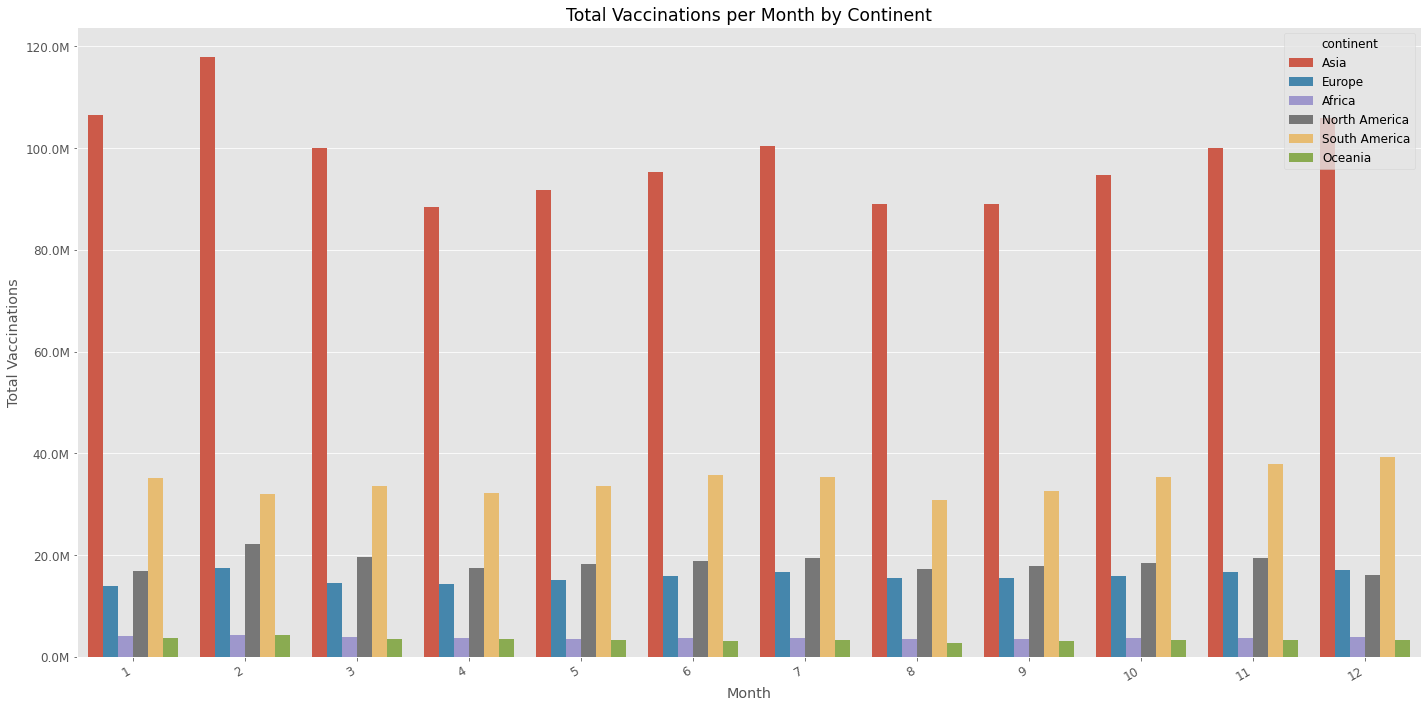

In [80]:
plot_bar(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

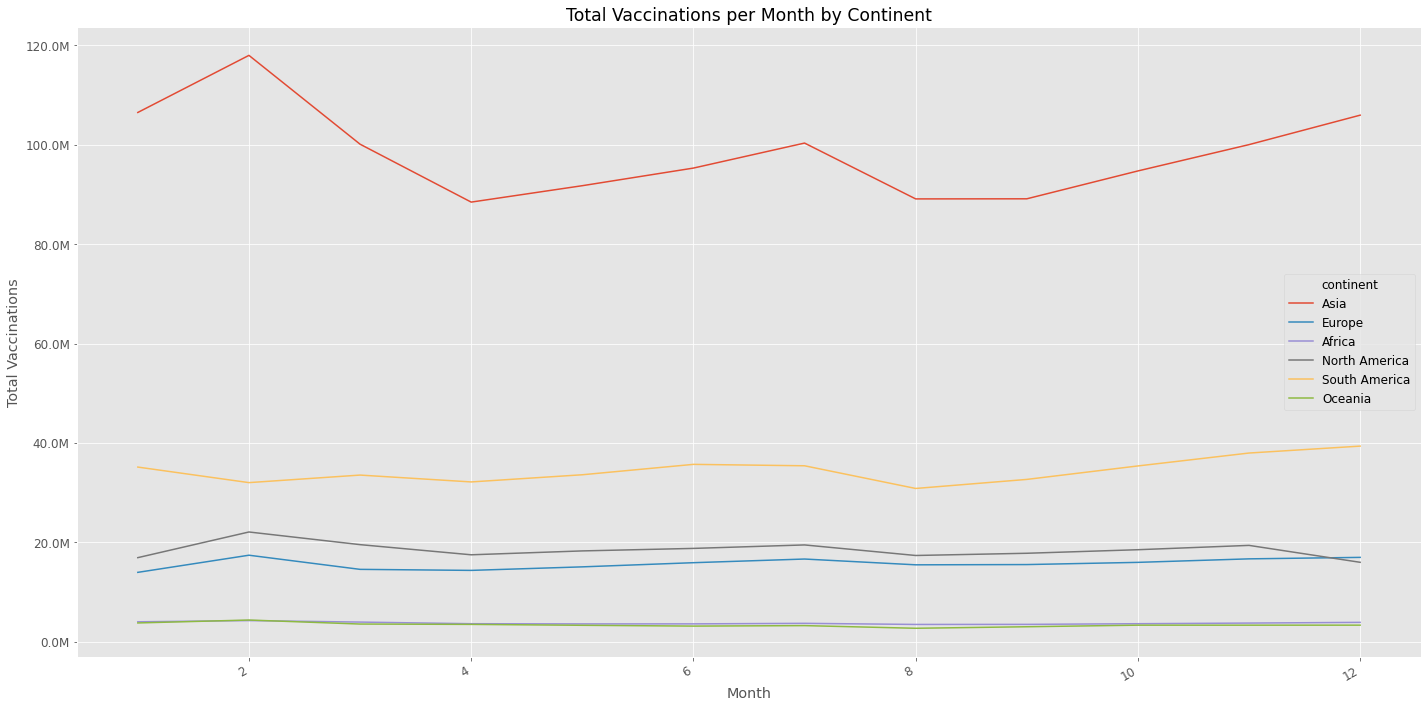

In [81]:
plot_line(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

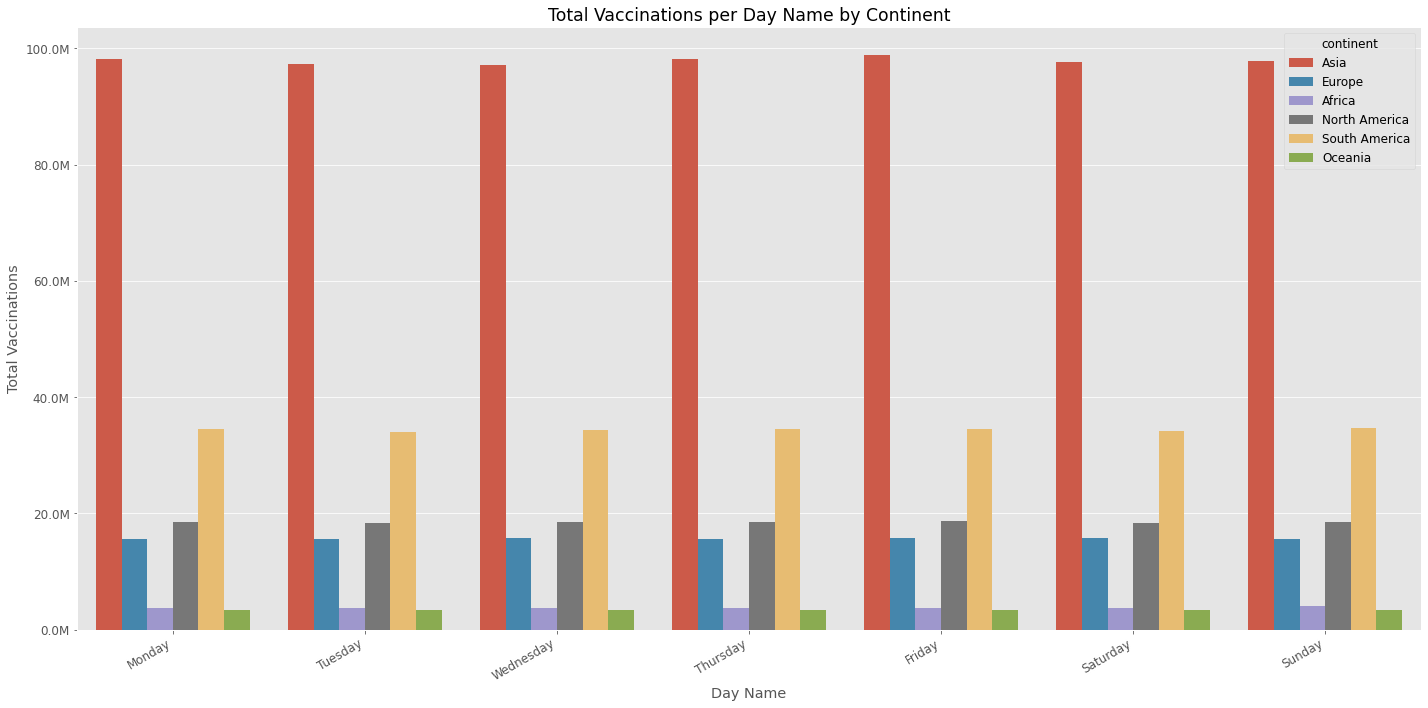

In [82]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

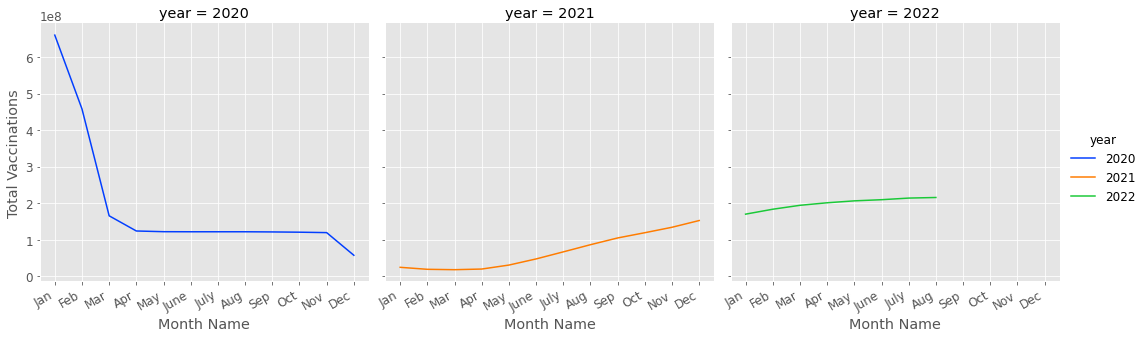

In [83]:
g3 = sns.relplot(
  data=df_vacc,
  x='month_name', y='total_vaccinations', ci=None,
  col='year', hue='year', palette='bright',
  kind='line'
)

g3.set(xlabel='Month Name', ylabel='Total Vaccinations')
g3.fig.autofmt_xdate()

# Demographics Exploration

In [84]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month_num', 'month_name', 
             'day', 'day_name']

df_demo = df_filled[demo_cols]
df_demo.head()

iso_code continent     location       date  population  population_density  \
0      AFG      Asia  Afghanistan 2020-02-24  40099462.0              54.422   
1      AFG      Asia  Afghanistan 2020-02-25  40099462.0              54.422   
2      AFG      Asia  Afghanistan 2020-02-26  40099462.0              54.422   
3      AFG      Asia  Afghanistan 2020-02-27  40099462.0              54.422   
4      AFG      Asia  Afghanistan 2020-02-28  40099462.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0        18.6          2.581          1.337        1803.987              NaN   
1        18.6          2.581          1.337        1803.987              NaN   
2        18.6          2.581          1.337        1803.987              NaN   
3        18.6          2.581          1.337        1803.987              NaN   
4        18.6          2.581          1.337        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  excess_mortality_cumulative_absolute  \
0                    0.511                                   NaN   
1                    0.511                                   NaN   
2                    0.511                                   NaN   
3                    0.511                                   NaN   
4                    0.511                                   NaN   

   excess_mortality_cumulative  excess_mortality  \
0                          NaN               NaN   
1                          NaN               NaN   
2                          NaN               NaN   
3                          NaN               NaN   
4                          NaN               NaN   

   excess_mortality_cumulative_per_million  year  month_num month_name  day  \
0                                      NaN  2020          2        Feb   24   
1                                      NaN  2020          2        Feb   25   
2                                      NaN  2020          2        Feb   26   
3                                      NaN  2020          2        Feb   27   
4                                      NaN  2020          2        Feb   28   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [85]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

population  population_density    median_age  aged_65_older  \
count  2.05843e+05        184271.00000  170749.00000   168944.00000   
mean   1.43217e+08           457.34831      30.63979        8.82070   
std    6.96136e+08          2109.02965       9.06509        6.13096   
min    4.70000e+01             0.13700      15.10000        1.14400   
25%    8.96007e+05            37.72800      22.30000        3.52600   
50%    7.49458e+06            88.12500      30.60000        6.70400   
75%    3.35739e+07           214.24300      39.10000       14.17800   
max    7.90930e+09         20546.76600      48.20000       27.04900   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   169855.00000    169760.00000     110731.00000           170324.00000   
mean         5.56422     19600.86350         13.62837              260.96833   
std          4.16453     20563.94606         20.03505              119.92554   
min          0.52600       661.24000          0.10000               79.37000   
25%          2.06300      4449.89800          0.60000              170.05000   
50%          4.20900     12951.83900          2.20000              243.96400   
75%          8.67800     27936.89600         21.40000              329.94200   
max         18.49300    116935.60000         77.60000              724.41700   

       diabetes_prevalence  female_smokers  male_smokers  \
count         178774.00000    128830.00000  127065.00000   
mean               8.36582        10.65960      32.80088   
std                4.69437        10.60445      13.53282   
min                0.99000         0.10000       7.70000   
25%                5.31000         1.90000      21.60000   
50%                7.20000         6.30000      31.40000   
75%               10.59000        19.30000      41.30000   
max               30.53000        44.00000      78.10000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count             83652.00000                151342.00000     193712.00000   
mean                 50.87566                     3.08492         73.64456   
std                  31.84707                     2.55105          7.44902   
min                   1.18800                     0.10000         53.28000   
25%                  20.85900                     1.30000         69.50000   
50%                  49.83900                     2.50000         75.05000   
75%                  82.50200                     4.00000         79.07000   
max                 100.00000                    13.80000         86.75000   

       human_development_index  excess_mortality_cumulative_absolute  \
count             165887.00000                           1.02018e+05   
mean                   0.72500                           3.30999e+04   
std                    0.14971                           9.35015e+04   
min                    0.39400                          -3.77261e+04   
25%                    0.60200                           7.39655e+01   
50%                    0.74300                           4.52791e+03   
75%                    0.84500                           1.91333e+04   
max                    0.95700                           1.21908e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 102018.00000      102018.00000   
mean                       9.09072          15.75655   
std                       11.79628          14.31740   
min                      -28.45000         -95.92000   
25%                        1.25429           5.75074   
50%                        6.50591          12.80426   
75%                       14.20000          24.43828   
max                       76.55000         375.98000   

       excess_mortality_cumulative_per_million  
count                             102018.00000  
mean                                1009.93075  
std                                 1174.12399  
min                                -1694.14612  
25% 

In [86]:
df_demo.isna().sum()                                   # check missing values

iso_code                                        0
continent                                   11971
location                                        0
date                                            0
population                                   1230
population_density                          22802
median_age                                  36324
aged_65_older                               38129
aged_70_older                               37218
gdp_per_capita                              37313
extreme_poverty                             96342
cardiovasc_death_rate                       36749
diabetes_prevalence                         28299
female_smokers                              78243
male_smokers                                80008
handwashing_facilities                     123421
hospital_beds_per_thousand                  55731
life_expectancy                             13361
human_development_index                     41186
excess_mortality_cumulative_absolute       105055


<AxesSubplot:>

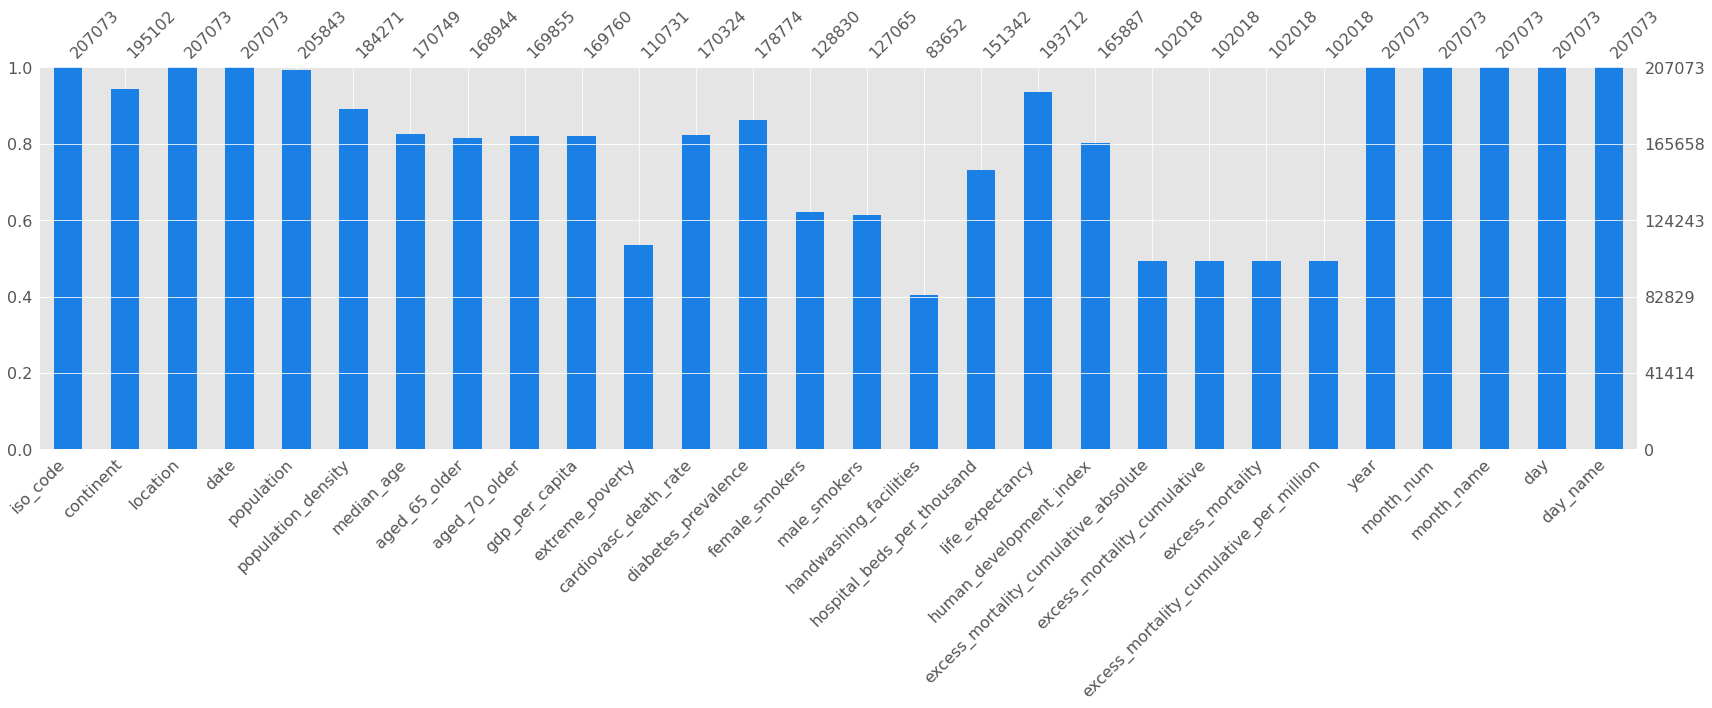

In [87]:
msno.bar(df_demo, labels=True, color=(0.1, 0.5, 0.9))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

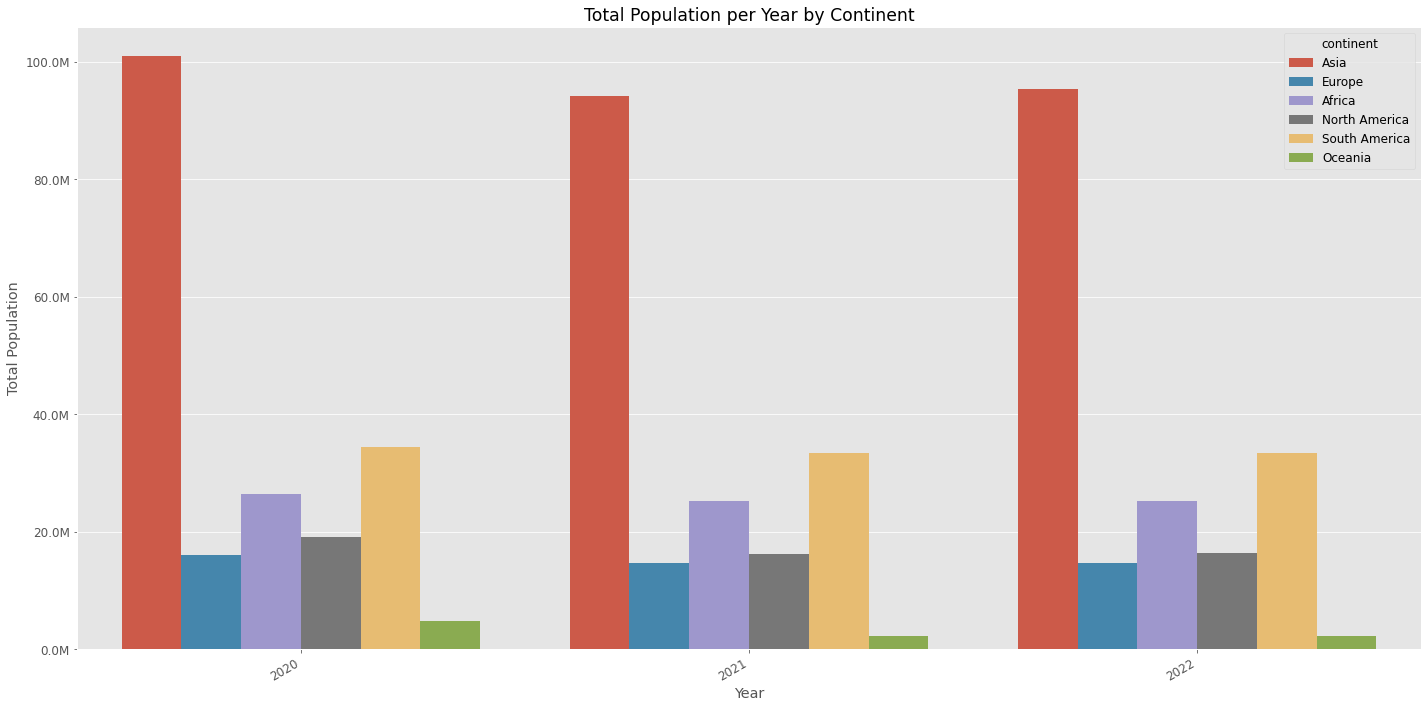

In [88]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', 
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

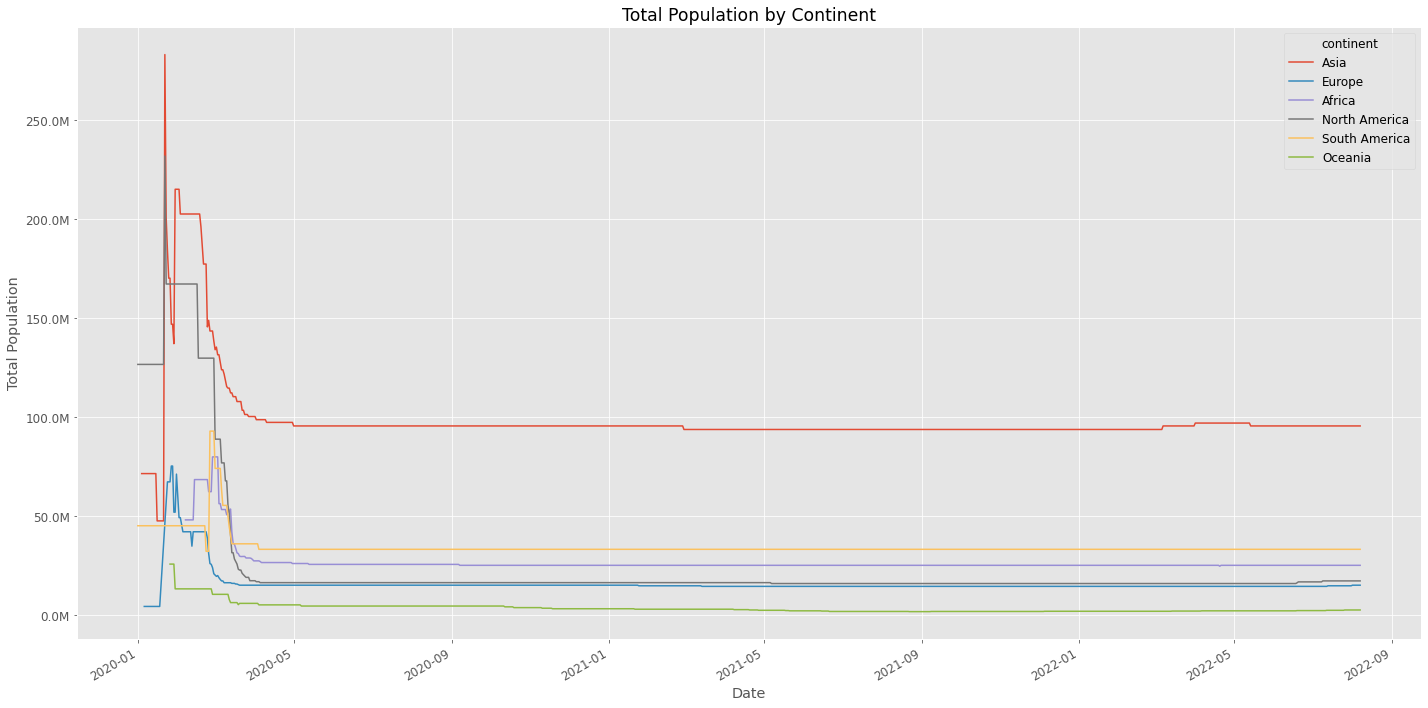

In [89]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

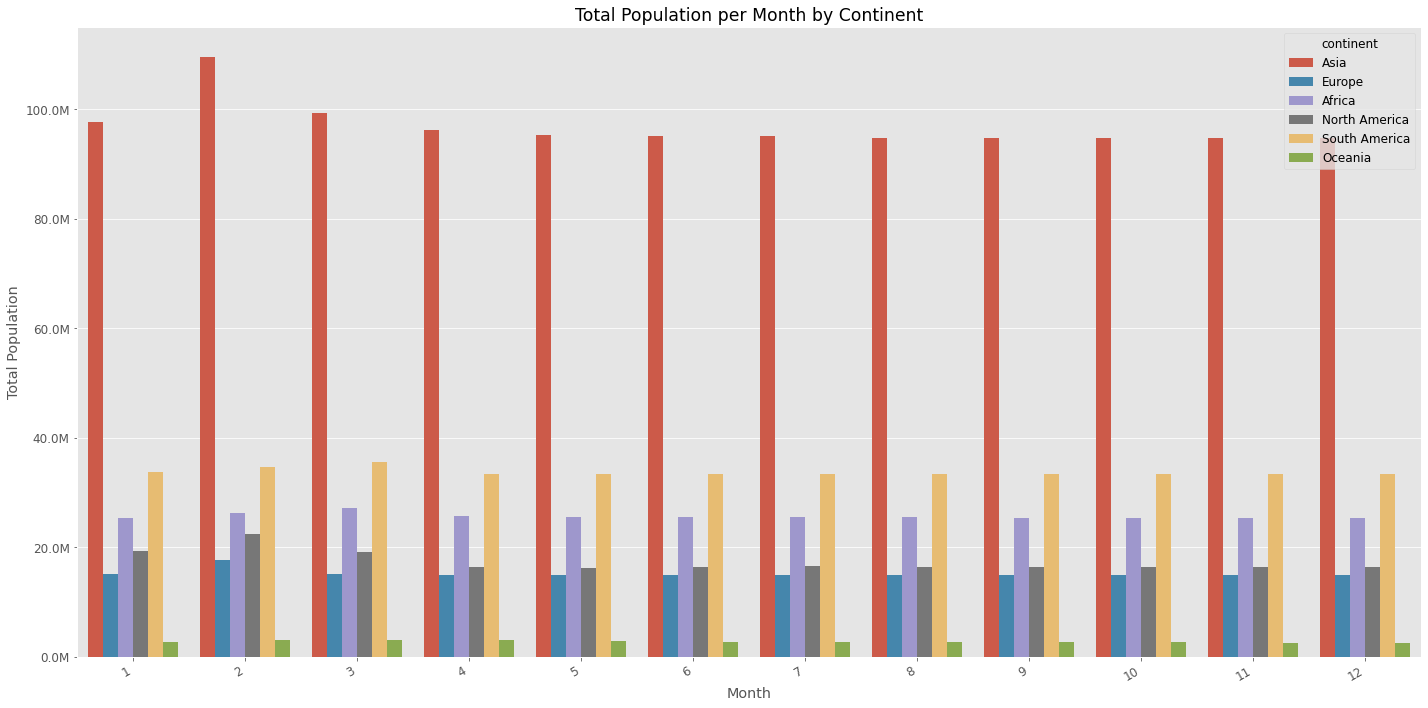

In [90]:
plot_bar(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

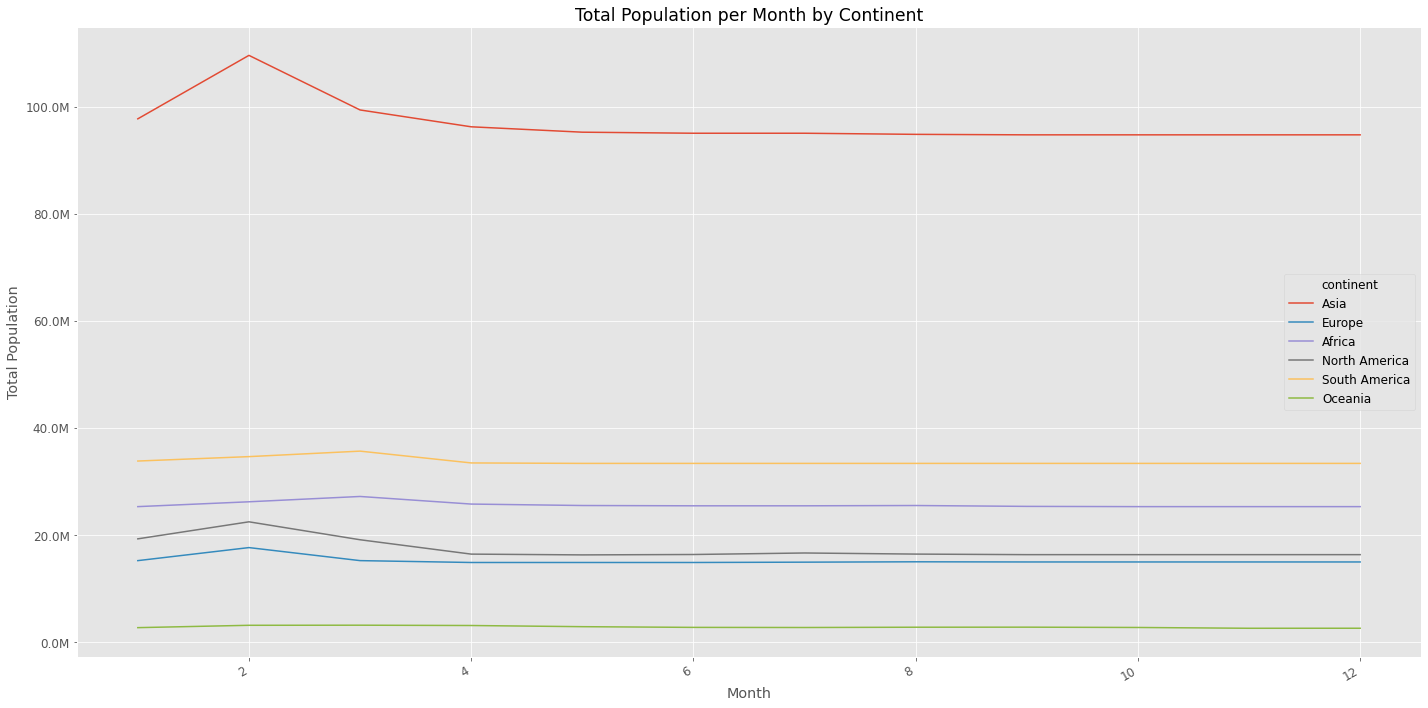

In [91]:
plot_line(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

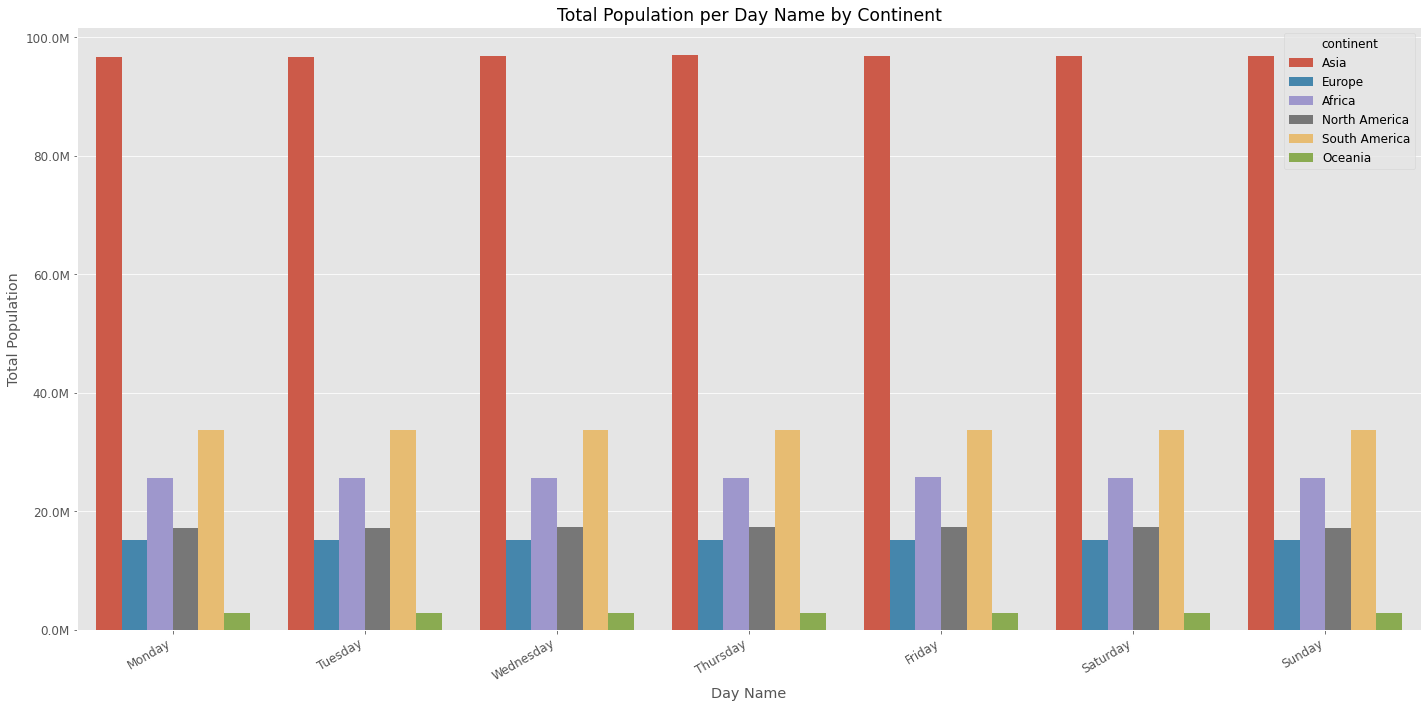

In [92]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

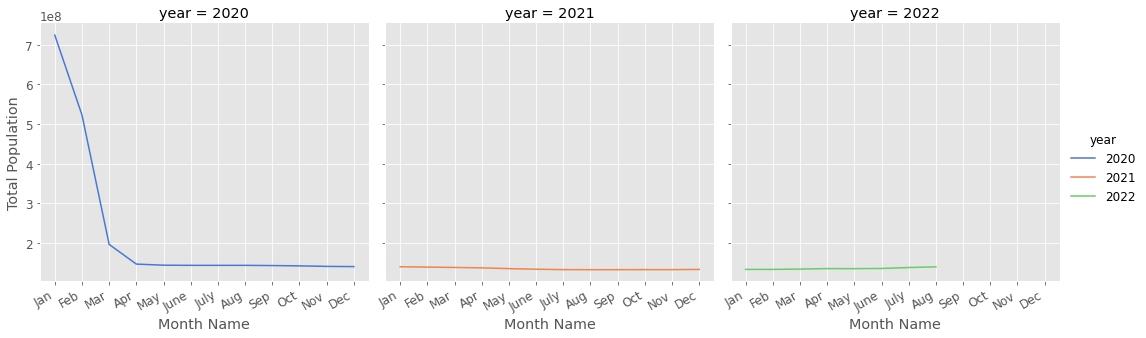

In [93]:
g4 = sns.relplot(
  data=df_demo,
  x='month_name', y='population', ci=None,
  col='year', hue='year', palette='muted',
  kind='line'
)

g4.set(xlabel='Month Name', ylabel='Total Population')
g4.fig.autofmt_xdate()

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

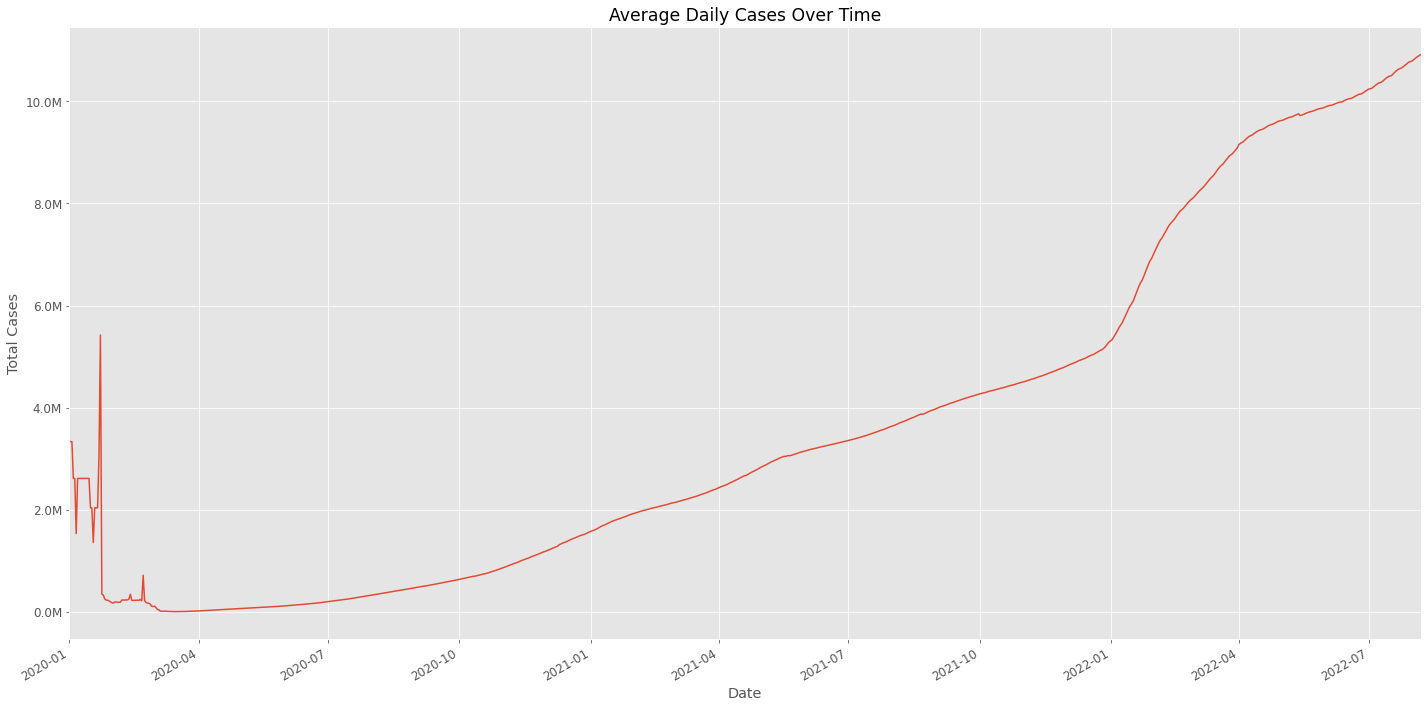

In [94]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

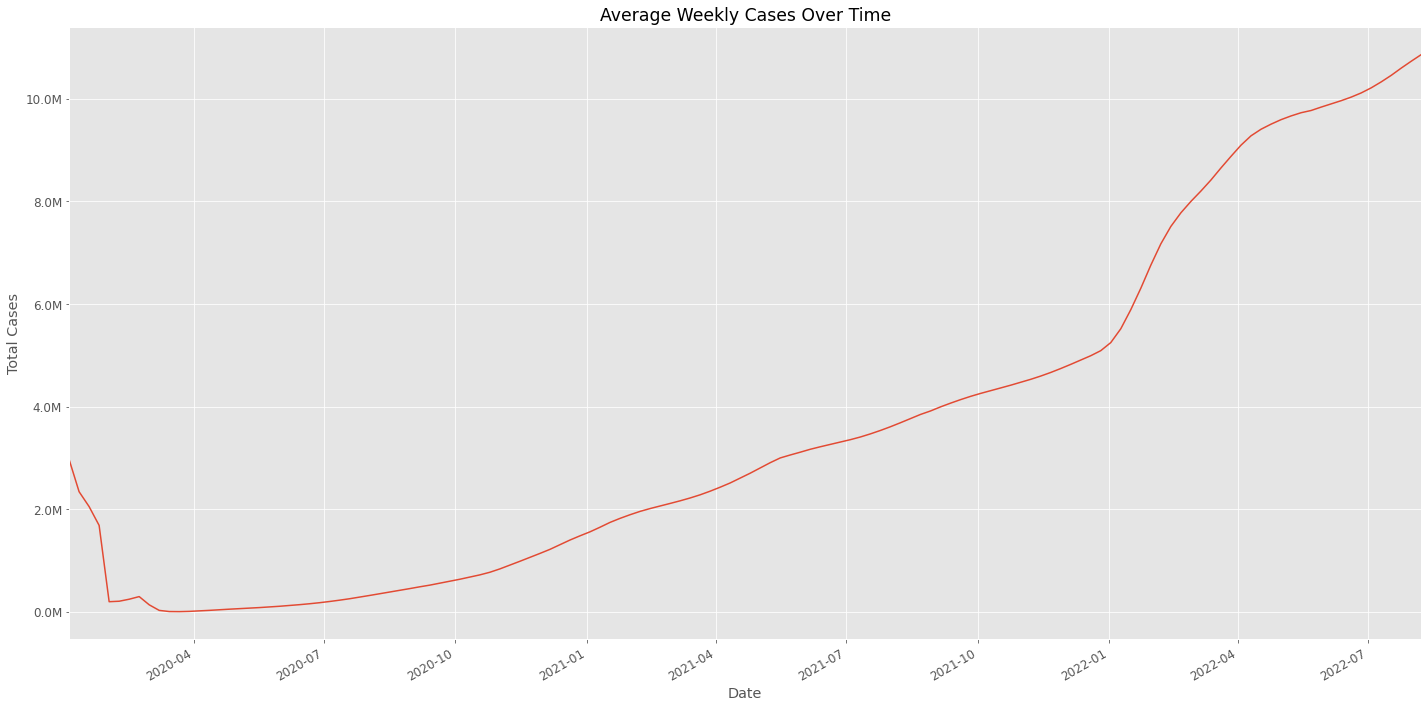

In [95]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

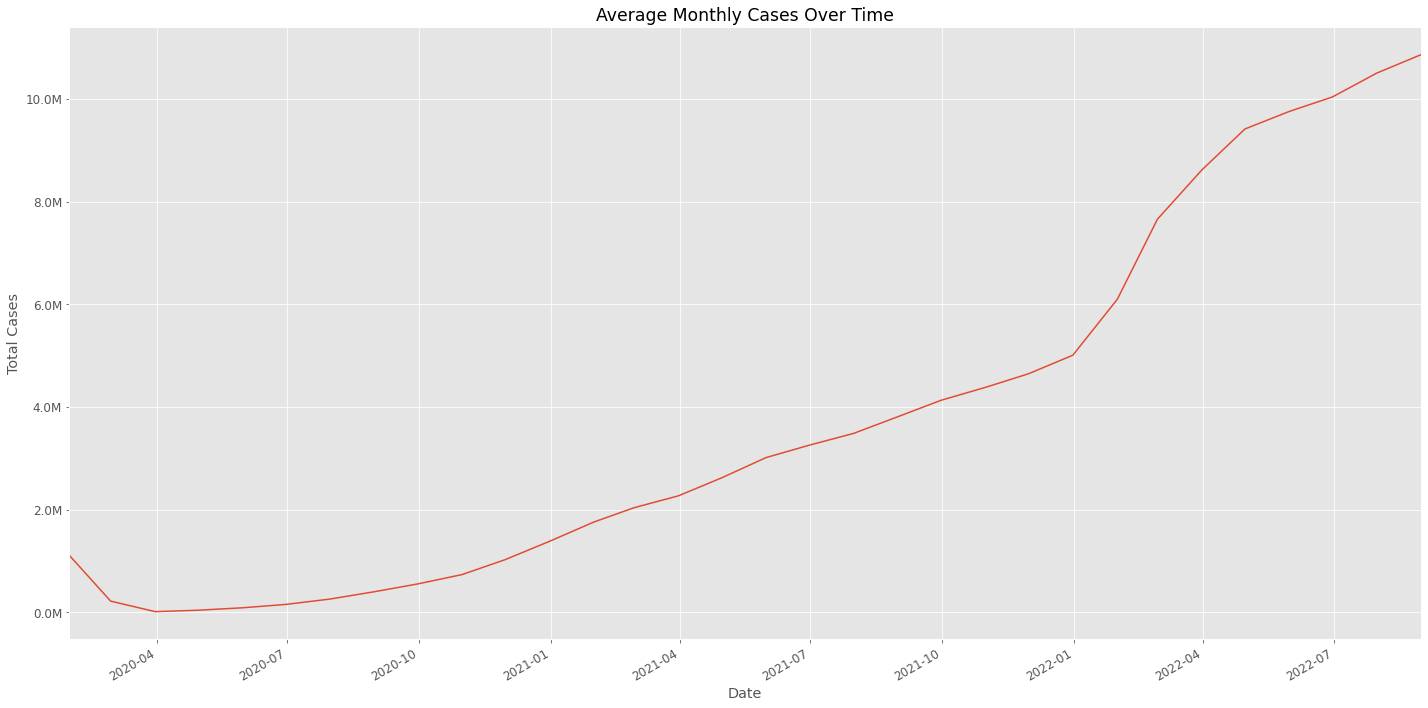

In [96]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

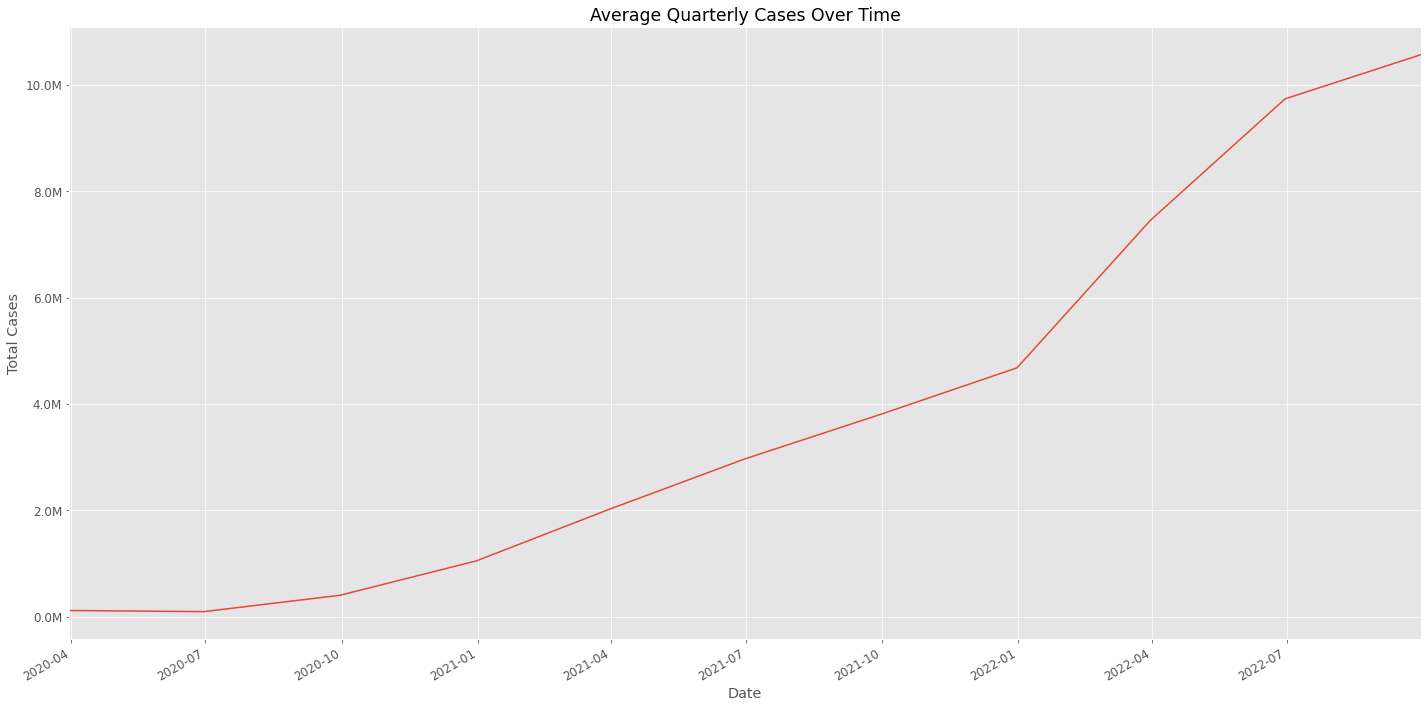

In [97]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

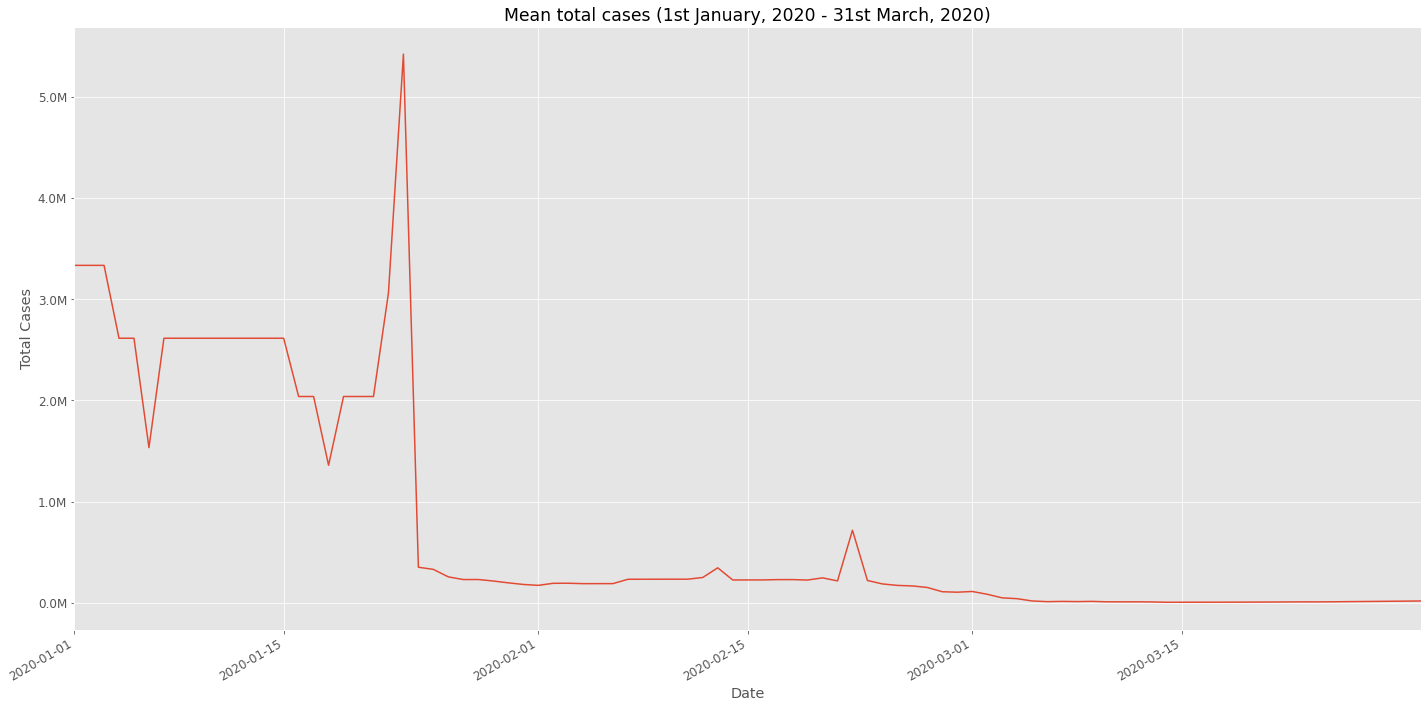

In [98]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-03-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st March, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

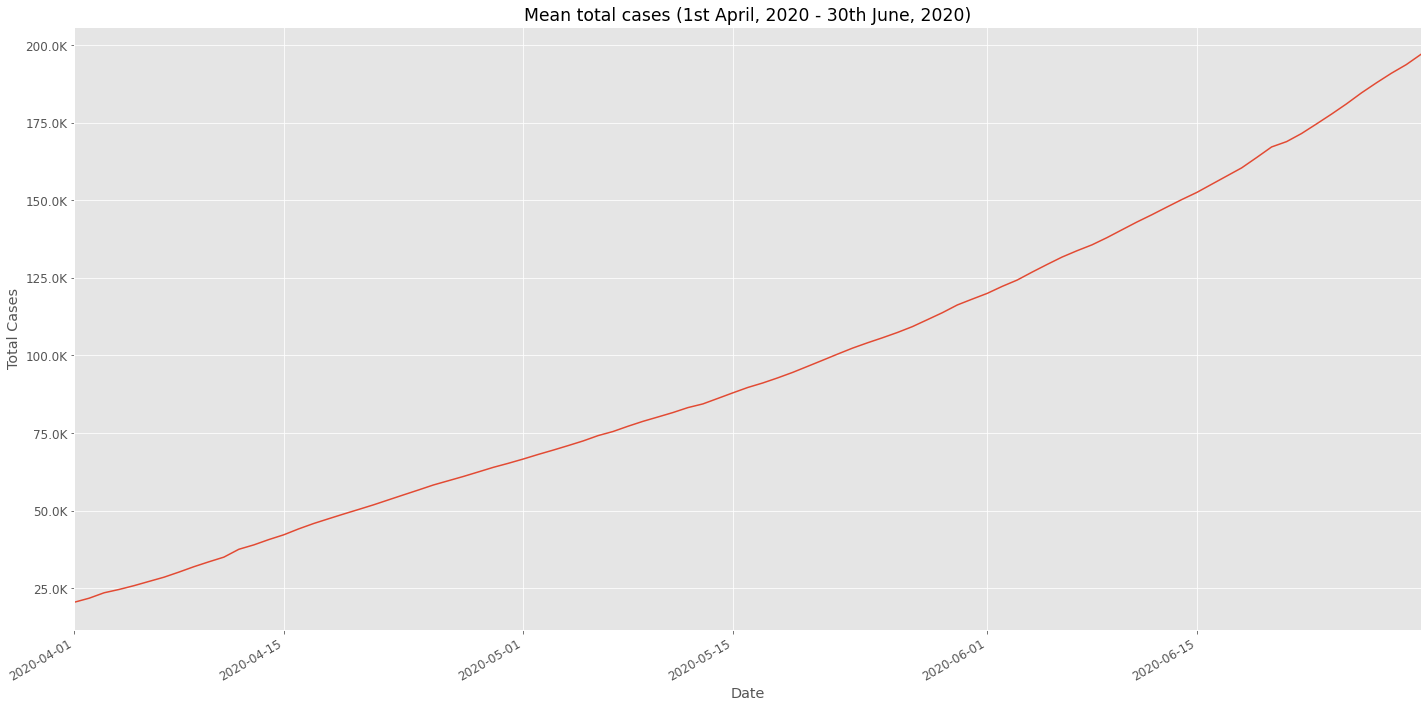

In [99]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-04-01', after='2020-06-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st April, 2020 - 30th June, 2020)',
    formatter=format_tsd
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

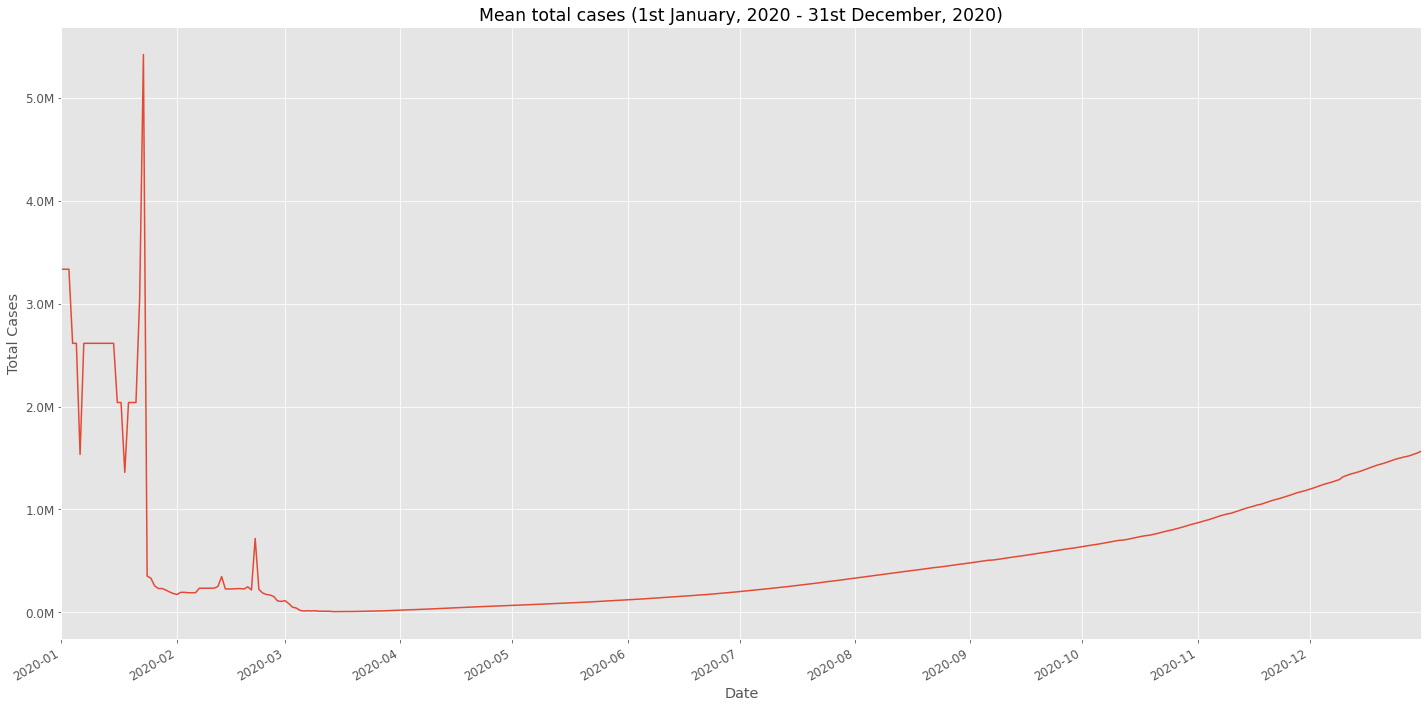

In [100]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

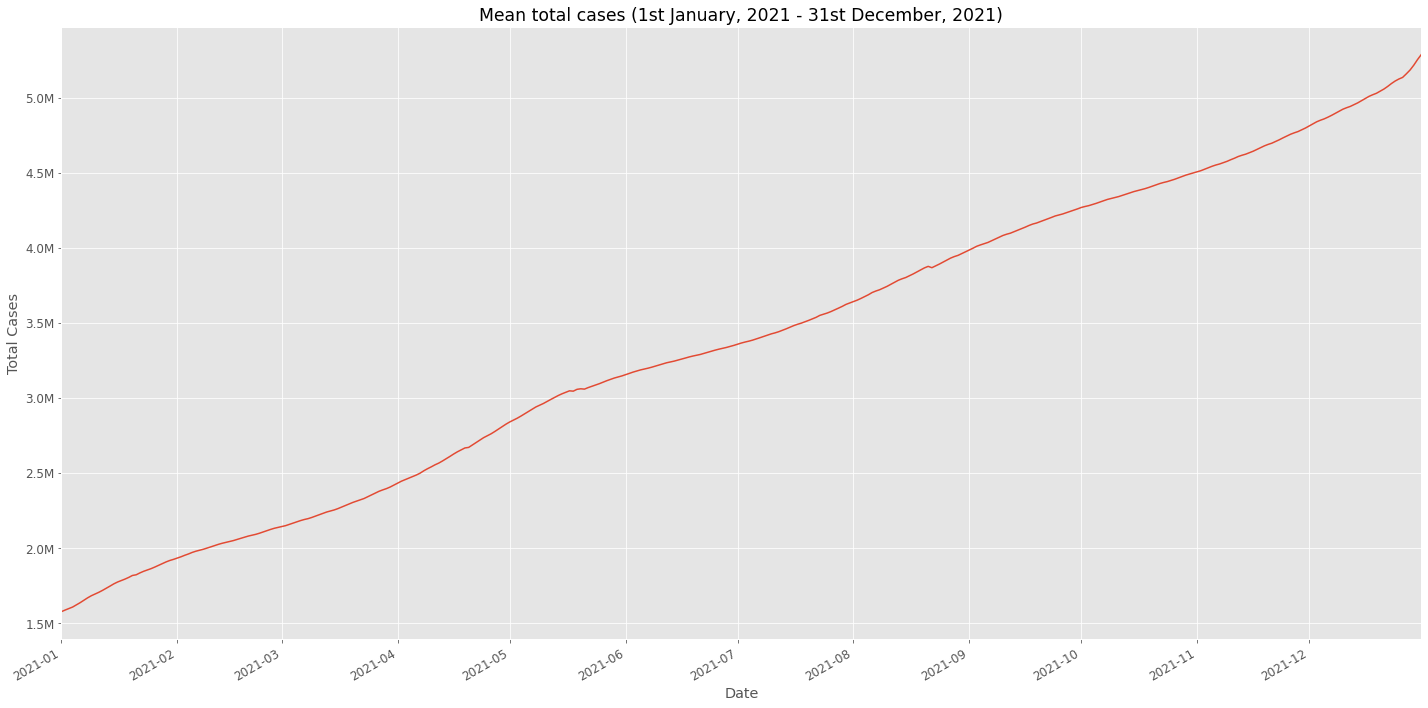

In [101]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

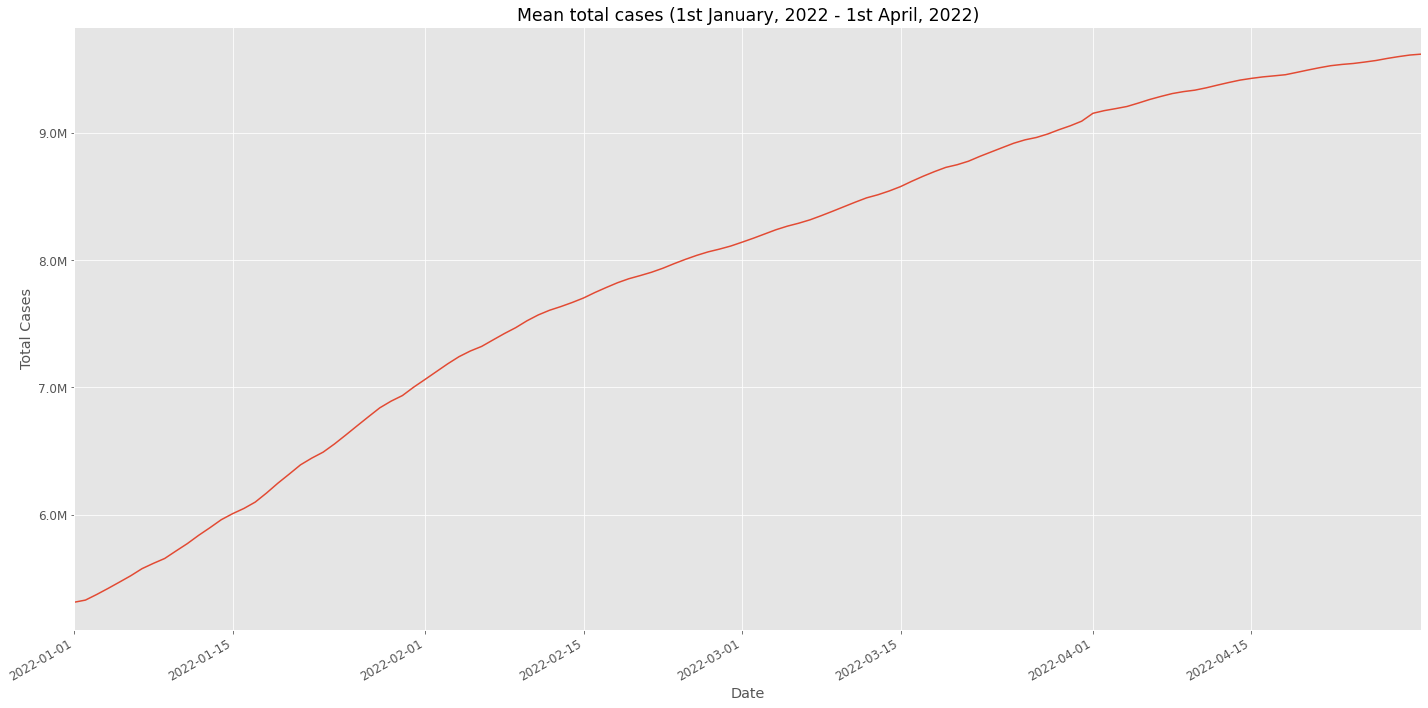

In [102]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-04-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st April, 2022)',
    formatter=format_mill
)